#TESTED PROCESS LISTS


Short Processes, Short List, Low Variance
process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

Long Processes, Short List, Low Variance
process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]




Short Processes, Short List, High Variance
process_list3 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3),
    Process(5, 6, 4),
    Process(6, 7, 6),
    Process(7, 8, 8),
    Process(8, 5, 10),
    Process(9, 10, 12),
    Process(10, 4, 13)
]

Short Processes, Long List, High Variance
process_list4 = [
    Process(1, 8, 0),
    Process(2, 12, 1),
    Process(3, 5, 2),
    Process(4, 9, 3),
    Process(5, 6, 4),
    Process(6, 7, 5),
    Process(7, 15, 6),
    Process(8, 10, 7),
    Process(9, 4, 8),
    Process(10, 13, 9),
    Process(11, 3, 10),
    Process(12, 14, 11),
    Process(13, 11, 12),
    Process(14, 6, 13),
    Process(15, 5, 14),
    Process(16, 7, 15),
    Process(17, 9, 16),
    Process(18, 4, 17),
    Process(19, 8, 18),
    Process(20, 10, 19)
]


Mixed List, High Variance
process_list5 = [
    Process(1, 10, 0),
    Process(2, 300, 1),
    Process(3, 15, 2),
    Process(4, 280, 3),
    Process(5, 20, 4),
    Process(6, 310, 5),
    Process(7, 25, 6),
    Process(8, 290, 7),
    Process(9, 30, 8),
    Process(10, 275, 9),
    Process(11, 12, 10),
    Process(12, 265, 11),
    Process(13, 18, 12),
    Process(14, 295, 13),
    Process(15, 22, 14),
    Process(16, 250, 15),
    Process(17, 35, 16),
    Process(18, 240, 17),
    Process(19, 40, 18),
    Process(20, 330, 19)
]

Process List to test SJF approach
process_list_sjf_fail = [
    Process(1, 25, 0),   # Long job arrives first
    Process(2, 2, 2),
    Process(3, 1, 4),
    Process(4, 7, 6),
    Process(5, 2, 8),
    Process(6, 1, 10),
    Process(7, 2, 12),
    Process(8, 30, 14),
    Process(9, 7, 15),
    Process(10, 9, 16),
    Process(11, 4, 17),
    Process(12, 8, 18),
    Process(13, 10, 19)
]






In [421]:
import statistics

class Process:
    def __init__(self, pid, burst_time, arrival_time=0):
        self.pid = pid
        self.bt = burst_time  # Original Burst Time
        self.rt = burst_time  # Remaining Time
        self.at = arrival_time  # Arrival Time
        self.ct = 0  # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0  # Waiting Time

def calculate_time_quantum_marr(processes, time):
    burst_times = [p.rt for p in processes if p.rt > 0 and p.at<=time]  # Consider only remaining times
    if not burst_times:
        return 0
    median_bt = statistics.median(burst_times)
    avg_bt = sum(burst_times) / len(burst_times)
    return (median_bt + avg_bt) / 2  # MARR Time Quantum Formula

def marr_scheduling(processes):
    time = 0  # System clock
    completed = 0  # Completed process count
    total_processes = len(processes)
    queue = sorted(processes, key=lambda x: (x.at<=time, x.at, x.bt))  # Sort by arrival time, then BT
    context_switches = 0

    while completed < total_processes:
        tq = calculate_time_quantum_marr(queue, time)  # Recalculate Time Quantum
        if tq == 0:
            break  # If no process is left, stop execution

        for process in queue:
            if process.rt > 0 and process.at <= time:
                execution_time = min(process.rt, tq)  # Process executes for min(remaining BT, TQ)
                time += execution_time
                process.rt -= execution_time

                # Check if process completed
                if process.rt == 0:
                    process.ct = time
                    process.tat = process.ct - process.at
                    process.wt = process.tat - process.bt
                    completed += 1
                
                context_switches += 1  # Context switch occurs

        # Re-sort queue based on new arrivals and remaining BT
        queue = sorted(queue, key=lambda x: (x.rt > 0, x.at, x.rt))

    # Calculate average turnaround time and waiting time
    total_tat = sum(p.tat for p in processes)
    total_wt = sum(p.wt for p in processes)
    avg_tat = total_tat / total_processes
    avg_wt = total_wt / total_processes

    print("\nProcess Execution Summary:")
    print("PID | Arrival | Burst | Completion | Turnaround | Waiting")
    for p in processes:
        print(f"{p.pid:3} | {p.at:7} | {p.bt:5} | {p.ct:10} | {p.tat:10} | {p.wt:7}")
    
    print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
    print(f"Average Waiting Time: {avg_wt:.2f}")
    print(f"Total Context Switches: {context_switches}")
    return avg_wt, avg_tat, context_switches






# MARR Algorithm

<br>--Paper Referenced: "A new median-average round Robin scheduling algorithm: An optimal approach for reducing turnaround and waiting time"

<br>--Name of function: marr_scheduling()

### Algorithm Proposed by Paper:
    1) Sort all Active processes by their Remaining Time.
    2) Calculate Time Quantum, tq = Median + Average / 2
    3) Allot all active processes the time quantum tq.
    4) Recalculate Time quantum including newly arrived processes, as done in Step 2.
    5) Repeat these steps

### Motivation Behind the Paper:
    The traditional Round Robin Algorithm does a lot in the way of being a fair time-sharing algorithm. They minimize Response Time. However, there is no "one size fits all" when it comes to picking a time quantum for performing Round Robin Scheduling. If the time quanta fixed is much lower compared to the burst times of the processes, the number of context switches and thus the context switch overhead would be very high and thus the TAT and WT may increase. If the time quanta fixed is very high, then the Scheduling will approach a traditional SJF or SRTF algorithm, in which case the process may suffer from starvation (as is typical with SJF and SRTF schedules). Thus, we desire to calculate the time quantum dynamically in such a way as to find a middle ground between the aforementioned extremes. The publishers of the paper found the mean + average / 2 formula to be a fair way to dynamically calculate the Time Quantum on the fly.


### Potential Drawbacks:
    1) Round Robin Algorithms like MARR tend to suffer from high context switching overheads and also often higher average TAT and WT
    2) For a large list of process, the median factor may not be enough to significantly prevent biased time quanta calculation (too high or too low).
    3) Doesn't allow for leeway in alloting extra CPU time to complete the burst of a process with little remaining time.


### Implementation of the Algorithms
    For every cycle of Round Robin, we calculate the mean + median / 2 for the currently active processes and we use that calculated time quantum for the cycle.


### Success in outperforming Traditional RR:
    As shown by the performance metrics, it hilariously outperformed the Traditional Round Robin Algorithm in both LIST 1 and LIST 2.



### Goal for the Project
    Seeing as how the MARR Algorithm is a very successful and renowned solution to traditional RR in Process Scheduling, our goal is to try to come up with a better algorithm than MARR. For this we have studied a few different papers to provide us with a solid base to work with. We have then tried to implement and adapt the paper, borrowing ideas from MARR while simultaneously innovating new ideas in order to achieve better results.

    The success of our algorithms and implementations has been judged using 6 test sets of processes, which are designed to cover different types of process lists so as to provide a fairer judgement and to remove bias. 


### Results of the Project
    We were able to achieve very satisfactory and stunning results with some of our algorithms and were indeed able to outshine MARR in our tests.

In [422]:
# Example Usage
process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

process_list2 = [
    Process(1, 99, 0),
    Process(2, 100, 1),
    Process(3, 101, 2),
    Process(4, 102, 3)
]

In [423]:
marr_scheduling(process_list1)


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         11 |         11 |       0
  2 |       1 |    12 |         23 |         22 |      10
  3 |       2 |    13 |         36 |         34 |      21
  4 |       3 |    14 |       50.0 |       47.0 |    33.0

Average Turnaround Time: 28.50
Average Waiting Time: 16.00
Total Context Switches: 5


(16.0, 28.5, 5)

In [424]:
marr_scheduling(process_list2)


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |         99 |         99 |       0
  2 |       1 |   100 |        199 |        198 |      98
  3 |       2 |   101 |        300 |        298 |     197
  4 |       3 |   102 |      402.0 |      399.0 |   297.0

Average Turnaround Time: 248.50
Average Waiting Time: 148.00
Total Context Switches: 5


(148.0, 248.5, 5)

In [425]:
store_avg_wt = 0
store_avg_tat = 0
store_context_switches = 0

In [426]:
class Process:
    def __init__(self, pid, burst_time, arrival_time=0):
        self.pid = pid
        self.bt = burst_time  # Original Burst Time
        self.rt = burst_time  # Remaining Time
        self.at = arrival_time  # Arrival Time
        self.ct = 0  # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0  # Waiting Time

def round_robin_scheduling(processes, time_quanta):
    time = 0  # System clock
    completed = 0  # Completed process count
    total_processes = len(processes)
    queue = []
    context_switches = 0
    last_arrival = max(p.at for p in processes) if processes else 0
    
    # Continue until all processes are completed
    while completed < total_processes:
        # Add newly arrived processes to the queue
        for p in processes:
            if p.at <= time and p not in queue and p.rt > 0:
                queue.append(p)
        
        if not queue:
            # No processes ready, advance time to next arrival
            if time <= last_arrival:
                time += 1
                continue
            else:
                break  # All processes have arrived and none are left
        
        current_process = queue.pop(0)
        context_switches += 1
        
        # Execute for the time quanta or remaining time, whichever is smaller
        execution_time = min(time_quanta, current_process.rt)
        time += execution_time
        current_process.rt -= execution_time
        
        # Check if process completed
        if current_process.rt == 0:
            current_process.ct = time
            current_process.tat = current_process.ct - current_process.at
            current_process.wt = current_process.tat - current_process.bt
            completed += 1
        else:
            # Re-add to queue if not completed
            queue.append(current_process)
    
    # Calculate average turnaround time and waiting time
    total_tat = sum(p.tat for p in processes)
    total_wt = sum(p.wt for p in processes)
    avg_tat = total_tat / total_processes if total_processes > 0 else 0
    avg_wt = total_wt / total_processes if total_processes > 0 else 0

    store_avg_wt = avg_wt
    store_avg_tat = avg_tat
    store_context_switches = context_switches

    print("\nProcess Execution Summary:")
    print("PID | Arrival | Burst | Completion | Turnaround | Waiting")
    for p in processes:
        print(f"{p.pid:3} | {p.at:7} | {p.bt:5} | {p.ct:10} | {p.tat:10} | {p.wt:7}")
    
    print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
    print(f"Average Waiting Time: {avg_wt:.2f}")
    print(f"Total Context Switches: {context_switches}")
    return avg_wt, avg_tat, context_switches

In [427]:
# Example Usage
process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

process_list2 = [
    Process(1, 99, 0),
    Process(2, 100, 1),
    Process(3, 101, 2),
    Process(4, 102, 3)
]

In [428]:
# Test with a time quantum of 4
round_robin_scheduling(process_list2, 22)


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |        297 |        297 |     198
  2 |       1 |   100 |        375 |        374 |     274
  3 |       2 |   101 |        388 |        386 |     285
  4 |       3 |   102 |        402 |        399 |     297

Average Turnaround Time: 364.00
Average Waiting Time: 263.50
Total Context Switches: 20


(263.5, 364.0, 20)

In [429]:
# Test with a time quantum of 4
round_robin_scheduling(process_list1, 5)


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         26 |         26 |      15
  2 |       1 |    12 |         43 |         42 |      30
  3 |       2 |    13 |         46 |         44 |      31
  4 |       3 |    14 |         50 |         47 |      33

Average Turnaround Time: 39.75
Average Waiting Time: 27.25
Total Context Switches: 12


(27.25, 39.75, 12)


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         36 |         36 |      25
  2 |       1 |    12 |         44 |         43 |      31
  3 |       2 |    13 |         48 |         46 |      33
  4 |       3 |    14 |         50 |         47 |      33

Average Turnaround Time: 43.00
Average Waiting Time: 30.50
Total Context Switches: 50

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         33 |         33 |      22
  2 |       1 |    12 |         43 |         42 |      30
  3 |       2 |    13 |         48 |         46 |      33
  4 |       3 |    14 |         50 |         47 |      33

Average Turnaround Time: 42.00
Average Waiting Time: 29.50
Total Context Switches: 26

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         29 |         29 |      18
  2 |       1 |    12 |         41 |         4

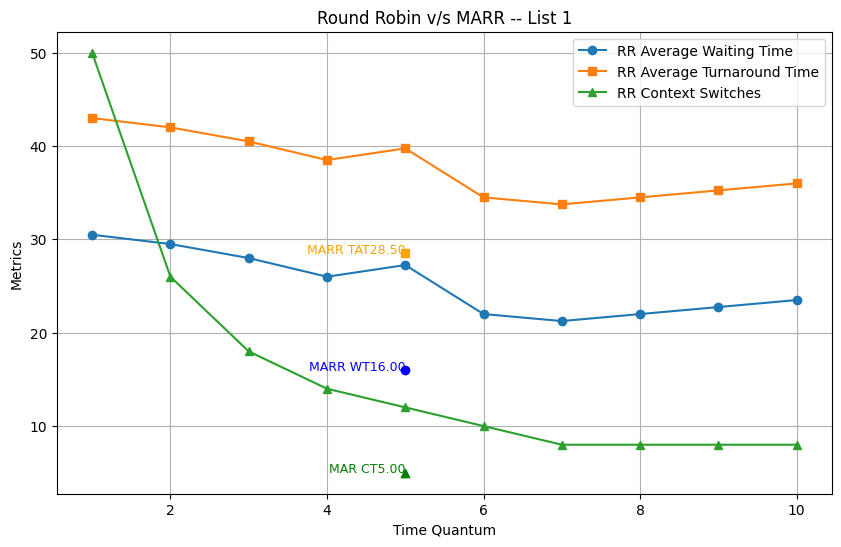

In [430]:
import matplotlib.pyplot as plt
import numpy as np

rr_avg_waiting_times = []
rr_avg_turnaround_times = []
rr_avg_context_switches = []

for i in range(1, 11):
    process_list1 = [
        Process(1, 11, 0),
        Process(2, 12, 1),
        Process(3, 13, 2),
        Process(4, 14, 3)
    ]
    rr_result = round_robin_scheduling(process_list1, i)
    rr_avg_waiting_times.append(rr_result[0])
    rr_avg_turnaround_times.append(rr_result[1])
    rr_avg_context_switches.append(rr_result[2])
    
plt.figure(figsize=(10, 6))
x = range(1, 11)

plt.plot(x, rr_avg_waiting_times, label='RR Average Waiting Time', marker='o')
plt.plot(x, rr_avg_turnaround_times, label='RR Average Turnaround Time', marker='s')
plt.plot(x, rr_avg_context_switches, label='RR Context Switches', marker='^')

plt.title('Round Robin v/s MARR -- List 1')
plt.xlabel('Time Quantum')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)

process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

marr_result = marr_scheduling(process_list1)

# Plotting MARR points
plt.scatter(5, marr_result[0], label='MARR Average Waiting Time', color='blue', marker='o')
plt.scatter(5, marr_result[1], label='MARR Average Turnaround Time', color='orange', marker='s')
plt.scatter(5, marr_result[2], label='MARR Context Switches', color='green', marker='^')

# Adding labels for MARR points
plt.text(5, marr_result[0], f"MARR WT{marr_result[0]:.2f}", color='blue', fontsize=9, ha='right')
plt.text(5, marr_result[1], f"MARR TAT{marr_result[1]:.2f}", color='orange', fontsize=9, ha='right')
plt.text(5, marr_result[2], f"MAR CT{marr_result[2]:.2f}", color='green', fontsize=9, ha='right')

plt.show()



Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         11 |         11 |       0
  2 |       1 |    12 |         23 |         22 |      10
  3 |       2 |    13 |         36 |         34 |      21
  4 |       3 |    14 |       50.0 |       47.0 |    33.0

Average Turnaround Time: 28.50
Average Waiting Time: 16.00
Total Context Switches: 5
MARR Scheduling Results:
Average Waiting Time: 16.00
Average Turnaround Time: 28.50
Total Context Switches: 5


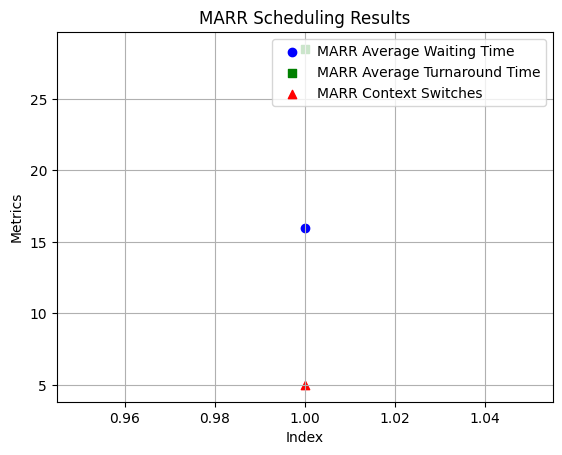

In [431]:
# Re-defining process_list1
process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

# Apply MARR scheduling
marr_result = marr_scheduling(process_list1)

# Display the results
print("MARR Scheduling Results:")
print(f"Average Waiting Time: {marr_result[0]:.2f}")
print(f"Average Turnaround Time: {marr_result[1]:.2f}")
print(f"Total Context Switches: {marr_result[2]}")

# Plotting the points
plt.scatter(1, marr_result[0], label='MARR Average Waiting Time', color='blue', marker='o')
plt.scatter(1, marr_result[1], label='MARR Average Turnaround Time', color='green', marker='s')
plt.scatter(1, marr_result[2], label='MARR Context Switches', color='red', marker='^')

plt.title('MARR Scheduling Results')
plt.xlabel('Index')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |        388 |        388 |     289
  2 |       1 |   100 |        396 |        395 |     295
  3 |       2 |   101 |        400 |        398 |     297
  4 |       3 |   102 |        402 |        399 |     297

Average Turnaround Time: 395.00
Average Waiting Time: 294.50
Total Context Switches: 402

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |        385 |        385 |     286
  2 |       1 |   100 |        395 |        394 |     294
  3 |       2 |   101 |        400 |        398 |     297
  4 |       3 |   102 |        402 |        399 |     297

Average Turnaround Time: 394.00
Average Waiting Time: 293.50
Total Context Switches: 202

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |        378 |        378 |     279
  2 |       1 |   100 |        397 |    

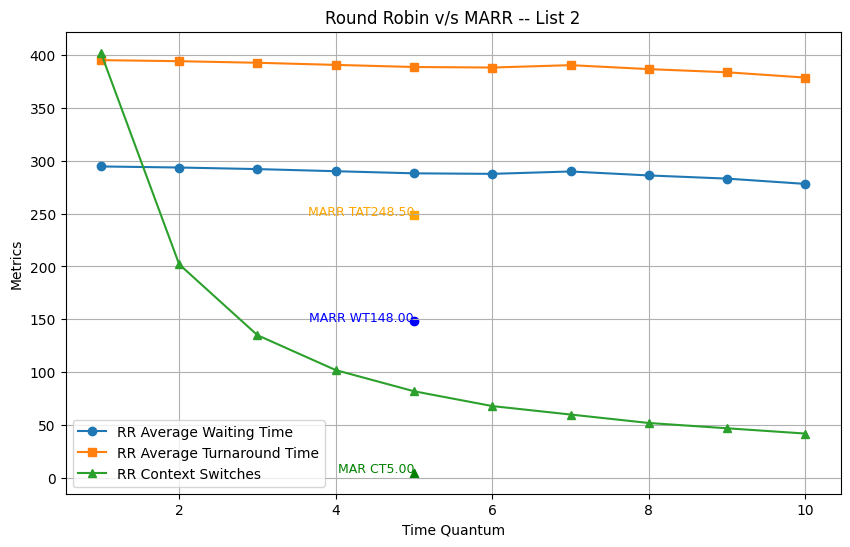

In [432]:
rr_avg_waiting_times = []
rr_avg_turnaround_times = []
rr_avg_context_switches = []

for i in range(1, 11):
    process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]
    rr_result = round_robin_scheduling(process_list2, i)
    rr_avg_waiting_times.append(rr_result[0])
    rr_avg_turnaround_times.append(rr_result[1])
    rr_avg_context_switches.append(rr_result[2])
    
plt.figure(figsize=(10, 6))
x = range(1, 11)

plt.plot(x, rr_avg_waiting_times, label='RR Average Waiting Time', marker='o')
plt.plot(x, rr_avg_turnaround_times, label='RR Average Turnaround Time', marker='s')
plt.plot(x, rr_avg_context_switches, label='RR Context Switches', marker='^')

plt.title('Round Robin v/s MARR -- List 2')
plt.xlabel('Time Quantum')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)

process_list2 = [
    Process(1, 99, 0),
    Process(2, 100, 1),
    Process(3, 101, 2),
    Process(4, 102, 3)
]

marr_result = marr_scheduling(process_list2)

# Plotting MARR points
plt.scatter(5, marr_result[0], label='MARR Average Waiting Time', color='blue', marker='o')
plt.scatter(5, marr_result[1], label='MARR Average Turnaround Time', color='orange', marker='s')
plt.scatter(5, marr_result[2], label='MARR Context Switches', color='green', marker='^')

# Adding labels for MARR points
plt.text(5, marr_result[0], f"MARR WT{marr_result[0]:.2f}", color='blue', fontsize=9, ha='right')
plt.text(5, marr_result[1], f"MARR TAT{marr_result[1]:.2f}", color='orange', fontsize=9, ha='right')
plt.text(5, marr_result[2], f"MAR CT{marr_result[2]:.2f}", color='green', fontsize=9, ha='right')

plt.show()



Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |         99 |         99 |       0
  2 |       1 |   100 |        199 |        198 |      98
  3 |       2 |   101 |        300 |        298 |     197
  4 |       3 |   102 |      402.0 |      399.0 |   297.0

Average Turnaround Time: 248.50
Average Waiting Time: 148.00
Total Context Switches: 5
MARR Scheduling Results:
Average Waiting Time: 148.00
Average Turnaround Time: 248.50
Total Context Switches: 5


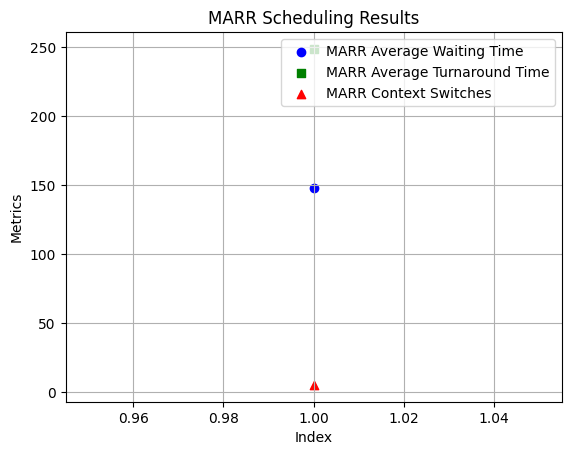

In [433]:
# Re-defining process_list2
process_list2 = [
    Process(1, 99, 0),
    Process(2, 100, 1),
    Process(3, 101, 2),
    Process(4, 102, 3)
]

# Apply MARR scheduling
marr_result = marr_scheduling(process_list2)

# Display the results
print("MARR Scheduling Results:")
print(f"Average Waiting Time: {marr_result[0]:.2f}")
print(f"Average Turnaround Time: {marr_result[1]:.2f}")
print(f"Total Context Switches: {marr_result[2]}")

# Plotting the points
plt.scatter(1, marr_result[0], label='MARR Average Waiting Time', color='blue', marker='o')
plt.scatter(1, marr_result[1], label='MARR Average Turnaround Time', color='green', marker='s')
plt.scatter(1, marr_result[2], label='MARR Context Switches', color='red', marker='^')

plt.title('MARR Scheduling Results')
plt.xlabel('Index')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [434]:

# From Paper: An Optimized Round Robin Scheduling Algorithm for CPU Scheduling by Ajit Singh, Priyanka Goyal and Sahil Batra


import statistics

class Process:
    def __init__(self, pid, burst_time, arrival_time=0):
        self.pid = pid
        self.bt = burst_time  # Original Burst Time
        self.rt = burst_time  # Remaining Time
        self.at = arrival_time  # Arrival Time
        self.ct = 0  # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0  # Waiting Time

def calculate_time_quantum(toggle, quantum):
    if toggle == 0:
        return quantum  # Use the original quantum
    else:
        return int(quantum*2)  # Double the quantum for the next round

def toggle_scheduling(processes, quantum):
    time = 0  # System clock
    completed = 0  # Completed process count
    total_processes = len(processes)
    queue = sorted(processes, key=lambda x: (x.rt>0, x.rt))  # Sort by Remaining Time
    context_switches = 0
    toggle = 0

    while completed < total_processes:
        tq = calculate_time_quantum(toggle, quantum)  # Recalculate Time Quantum
        if tq == 0:
            break  # If no process is left, stop execution
        executed = False     # Flag to check if any process executed in this round
        for process in queue:
              
            if process.rt > 0 and process.at <= time:
                execution_time = min(process.rt, tq)  # Process executes for min(remaining BT, TQ)
                time += execution_time
                process.rt -= execution_time
                executed = True
                # Check if process completed
                if process.rt == 0:
                    process.ct = time
                    process.tat = process.ct - process.at
                    process.wt = process.tat - process.bt   
                    completed += 1
                
                context_switches += 1  # Context switch occurs

        # Re-sort queue based on new arrivals and remaining BT
        queue = sorted(queue, key=lambda x: (x.rt > 0, x.rt))
        if executed == True:
            toggle = toggle - 1

    # Calculate average turnaround time and waiting time
    total_tat = sum(p.tat for p in processes)
    total_wt = sum(p.wt for p in processes)
    avg_tat = total_tat / total_processes
    avg_wt = total_wt / total_processes

    print("\nProcess Execution Summary:")
    print("PID | Arrival | Burst | Completion | Turnaround | Waiting")
    for p in processes:
        print(f"{p.pid:3} | {p.at:7} | {p.bt:5} | {p.ct:10} | {p.tat:10} | {p.wt:7}")
    
    print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
    print(f"Average Waiting Time: {avg_wt:.2f}")
    print(f"Total Context Switches: {context_switches}")
    return avg_wt, avg_tat, context_switches






# Toggling Quanta Algorithm

<br>--Paper Referenced: "An Optimized Round Robin Scheduling Algorithm for CPU Scheduling" by Ajit Singh, Priyanka Goel, Sahil Batra
<br>--Name of function: toggle_scheduling()

### Algorithm Proposed by this approach:
    1) Pick a starting time quantum, say 'k' units
    2) Apply a single cycle of RR scheduling with 'k' units of time quantum
    3) For the next cycle, toggle time quantum to double of k, i.e., set new time quantum to '2k'.
    4) Repeat RR scheduling with '2k' units of time quantum
    5) Toggle Time quantum back to 'k'
    6) Keep repeating the steps till the processes are all executed.

### Motivation Behind the this approach:
    As mentioned earlier, a dynamic time-quantum RR approach is preferred over static time-quantum variants. This paper comes up with a way to update time quanta between cycles of RR scheduling execution.


### Potential Drawbacks of the Proposed Algorithm:
    1) Starting time quantum 'k' is arbitrary and hasn't been defined by the paper.
    2) The oscillation between 'k' and '2k' doesn't take into consideration the burst times of processes, thus facing the same pitfalls of traditional RR scheduling.
    3) In some cases the oscillation between 'k' and '2k' might end up doing more harm because '2k' might become too large of a time quantum, thus facing SJF pitfalls.


### Implementation of the Algorithms
    Every Process is allocated 'k' time quanta in the CPU for a single cycle. After the cycle is complete, the time quanta is toggled to '2k'. After completion of the 2nd cycle the time quanta is toggled back to 'k'. THis repeats till all the executions are complete.


### Testing
    The Algorithm fails to reliably improve upon traditional Round Robin Algorithms, as proven by the tests carried out. The performance is barely better than (and in some cases worse than) traditional RR. There was an intention of introducing dynamism, but the algorithm is not adaptive and thus not dynamic enough. It has way too many pitfalls and the results are nowhere near satisfactory enough for us to consider using this algorithm as a base for beating the MARR algorithm. Thus, this algorithm was kept aside. 

    

In [435]:

# Standard SJF


import statistics
import numpy as np

class Process:
    def __init__(self, pid, burst_time, arrival_time=0):
        self.pid = pid
        self.bt = burst_time  # Original Burst Time
        self.rt = burst_time  # Remaining Time
        self.at = arrival_time  # Arrival Time
        self.ct = 0  # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0  # Waiting Time

def calculate_time_quantum_SJF(processes):
    return max(process.bt for process in processes)  # Use the maximum burst time as the quantum (Simulate SJF)

def SJF(processes):
    time = 0  # System clock
    completed = 0  # Completed process count
    total_processes = len(processes)
    queue = sorted(processes, key=lambda x: (x.rt>0, x.rt))  # Sort by Remaining Time
    context_switches = 0
    toggle = 0

    while completed < total_processes:
        tq = calculate_time_quantum_SJF(processes)  # Recalculate Time Quantum
        if tq == 0:
            break  # If no process is left, stop execution
        for process in queue:
              
            if process.rt > 0 and process.at <= time:
                execution_time = process.rt  # Process executes for min(remaining BT, TQ)
                time += execution_time
                process.rt -= execution_time
                if process.rt == 0:
                    process.ct = time
                    process.tat = process.ct - process.at
                    process.wt = process.tat - process.bt   
                    completed += 1
                
                context_switches += 1  # Context switch occurs

        # Re-sort queue based on new arrivals and remaining BT
        queue = sorted(queue, key=lambda x: (x.rt > 0, x.rt))

    # Calculate average turnaround time and waiting time
    total_tat = sum(p.tat for p in processes)
    total_wt = sum(p.wt for p in processes)
    avg_tat = total_tat / total_processes
    avg_wt = total_wt / total_processes

    print("\nProcess Execution Summary:")
    print("PID | Arrival | Burst | Completion | Turnaround | Waiting")
    for p in processes:
        print(f"{p.pid:3} | {p.at:7} | {p.bt:5} | {p.ct:10} | {p.tat:10} | {p.wt:7}")
    
    print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
    print(f"Average Waiting Time: {avg_wt:.2f}")
    print(f"Total Context Switches: {context_switches}")
    return avg_wt, avg_tat, context_switches






In [436]:
# Example Usage
process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

process_list2 = [
    Process(1, 99, 0),
    Process(2, 100, 1),
    Process(3, 101, 2),
    Process(4, 102, 3)
]


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |        388 |        388 |     289
  2 |       1 |   100 |        396 |        395 |     295
  3 |       2 |   101 |        400 |        398 |     297
  4 |       3 |   102 |        402 |        399 |     297

Average Turnaround Time: 395.00
Average Waiting Time: 294.50
Total Context Switches: 402

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |        385 |        385 |     286
  2 |       1 |   100 |        395 |        394 |     294
  3 |       2 |   101 |        400 |        398 |     297
  4 |       3 |   102 |        402 |        399 |     297

Average Turnaround Time: 394.00
Average Waiting Time: 293.50
Total Context Switches: 202

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |        378 |        378 |     279
  2 |       1 |   100 |        397 |    

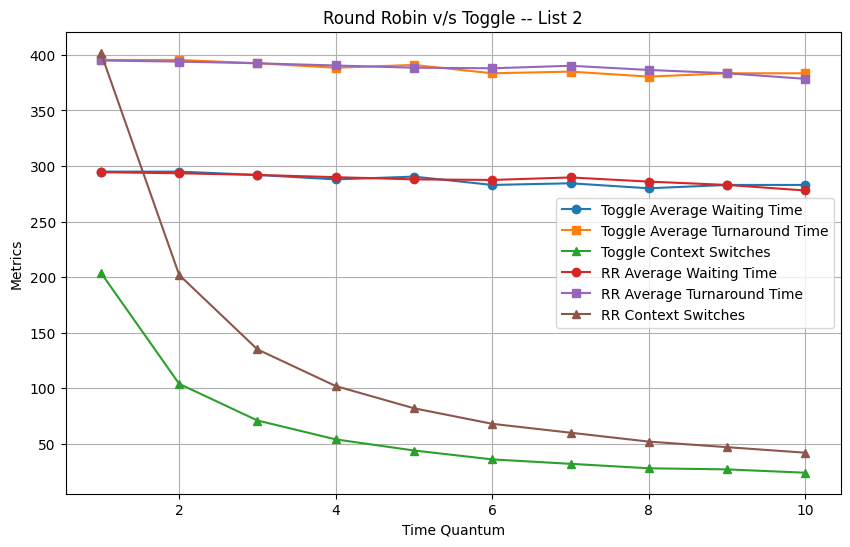

In [437]:
toggle_avg_waiting_times = []
toggle_avg_turnaround_times = []
toggle_avg_context_switches = []

rr_avg_waiting_times = []
rr_avg_turnaround_times = []
rr_avg_context_switches = []

for i in range(1, 11):
    process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]
    rr_result = round_robin_scheduling(process_list2, i)
    rr_avg_waiting_times.append(rr_result[0])
    rr_avg_turnaround_times.append(rr_result[1])
    rr_avg_context_switches.append(rr_result[2])
    




for i in range(1, 11):
    process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]
    toggle_result = toggle_scheduling(process_list2, i)
    toggle_avg_waiting_times.append(toggle_result[0])
    toggle_avg_turnaround_times.append(toggle_result[1])
    toggle_avg_context_switches.append(toggle_result[2])
    
plt.figure(figsize=(10, 6))
x = range(1, 11)

plt.plot(x, toggle_avg_waiting_times, label='Toggle Average Waiting Time', marker='o')
plt.plot(x, toggle_avg_turnaround_times, label='Toggle Average Turnaround Time', marker='s')
plt.plot(x, toggle_avg_context_switches, label='Toggle Context Switches', marker='^')
plt.plot(x, rr_avg_waiting_times, label='RR Average Waiting Time', marker='o')
plt.plot(x, rr_avg_turnaround_times, label='RR Average Turnaround Time', marker='s')
plt.plot(x, rr_avg_context_switches, label='RR Context Switches', marker='^')

plt.title('Round Robin v/s Toggle -- List 2')
plt.xlabel('Time Quantum')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         36 |         36 |      25
  2 |       1 |    12 |         44 |         43 |      31
  3 |       2 |    13 |         48 |         46 |      33
  4 |       3 |    14 |         50 |         47 |      33

Average Turnaround Time: 43.00
Average Waiting Time: 30.50
Total Context Switches: 50

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         33 |         33 |      22
  2 |       1 |    12 |         43 |         42 |      30
  3 |       2 |    13 |         48 |         46 |      33
  4 |       3 |    14 |         50 |         47 |      33

Average Turnaround Time: 42.00
Average Waiting Time: 29.50
Total Context Switches: 26

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         29 |         29 |      18
  2 |       1 |    12 |         41 |         4

<Figure size 1000x600 with 0 Axes>

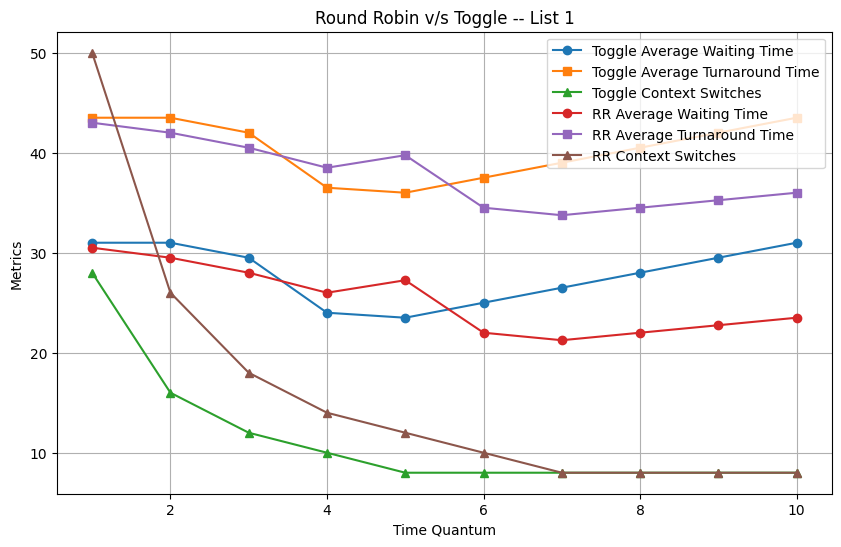

In [438]:
toggle_avg_high_waiting_times = []
toggle_avg_high_turnaround_times = []
toggle_avg_high_context_switches = []


rr_avg_waiting_times = []
rr_avg_turnaround_times = []
rr_avg_context_switches = []

for i in range(1, 11):
    process_list1 = [
        Process(1, 11, 0),
        Process(2, 12, 1),
        Process(3, 13, 2),
        Process(4, 14, 3)
    ]
    rr_result = round_robin_scheduling(process_list1, i)
    rr_avg_waiting_times.append(rr_result[0])
    rr_avg_turnaround_times.append(rr_result[1])
    rr_avg_context_switches.append(rr_result[2])
    
plt.figure(figsize=(10, 6))
x = range(1, 11)





for i in range(1, 11):
    process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
    ]
    toggle_result = toggle_scheduling(process_list1, i)
    toggle_avg_high_waiting_times.append(toggle_result[0])
    toggle_avg_high_turnaround_times.append(toggle_result[1])
    toggle_avg_high_context_switches.append(toggle_result[2])
    
plt.figure(figsize=(10, 6))
x = range(1, 11)

plt.plot(x, toggle_avg_high_waiting_times, label='Toggle Average Waiting Time', marker='o')
plt.plot(x, toggle_avg_high_turnaround_times, label='Toggle Average Turnaround Time', marker='s')
plt.plot(x, toggle_avg_high_context_switches, label='Toggle Context Switches', marker='^')
plt.plot(x, rr_avg_waiting_times, label='RR Average Waiting Time', marker='o')
plt.plot(x, rr_avg_turnaround_times, label='RR Average Turnaround Time', marker='s')
plt.plot(x, rr_avg_context_switches, label='RR Context Switches', marker='^')




plt.title('Round Robin v/s Toggle -- List 1')
plt.xlabel('Time Quantum')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)

In [439]:
#Algorithm Inspired by: A Priority based Round Robin CPU Scheduling Algorithm for Real Time Systems by Ishwari Singh Rajput, Deepa Gupta

import statistics

class Process:
    def __init__(self, pid, burst_time, arrival_time=0):
        self.pid = pid
        self.bt = burst_time  # Original Burst Time
        self.rt = burst_time  # Remaining Time
        self.at = arrival_time  # Arrival Time
        self.ct = 0  # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0  # Waiting Time

def calculate_time_quantum_rrsjf(processes):
    burst_times = [p.rt for p in processes if p.rt > 0]  # Consider only remaining times
    if not burst_times:
        return 0
    median_bt = statistics.median(burst_times)
    avg_bt = sum(burst_times) / len(burst_times)
    return (median_bt + avg_bt) / 2  # MARR Time Quantum Formula

def rrsjf_scheduling(processes):
    check = 0
    time = 0  # System clock
    completed = 0  # Completed process count
    total_processes = len(processes)
    queue = sorted(processes, key=lambda x: (x.rt>0, x.at, x.rt))  # Sort by arrival time, then BT
    context_switches = 0
    

    tq = calculate_time_quantum_rrsjf(queue)  # Initial Time Quantum
    while completed < total_processes:
        total_started = 0
        total_finished = 0
        if tq == 0:
            break  # If no process is left, stop execution
        
        for process in queue:
            if process.rt > 0 and process.at <= time:
                execution_time = min(process.rt, tq)  # Process executes for min(remaining BT, TQ)
                time += execution_time
                process.rt -= execution_time
                total_started += 1

                # Check if process completed
                if process.rt == 0:
                    process.ct = time
                    process.tat = process.ct - process.at
                    process.wt = process.tat - process.bt
                    completed += 1
                    total_finished += 1
                
                context_switches += 1  # Context switch occurs

        # Re-sort queue based on new arrivals and remaining BT
        queue = sorted(queue, key=lambda x: (x.rt > 0, x.at, x.rt))
        if check == 0:
            tq = max(process.rt for process in queue)
            check = 1
        
        # if total_finished < 0.5*total_started:
        #     tq=calculate_time_quantum_rrsjf(sorted(processes, key=lambda x: (x.rt>0, x.at, x.bt)))*1.5
        # else:
        #     tq=calculate_time_quantum_rrsjf(sorted(processes, key=lambda x: (x.rt>0, x.at, x.bt)))*1
        
        tq = max(process.rt for process in queue)  # Update Time Quantum based on remaining burst times
        print('COMPLETING CYCLE AT TIME :', time)
            
        

    # Calculate average turnaround time and waiting time
    total_tat = sum(p.tat for p in processes)
    total_wt = sum(p.wt for p in processes)
    avg_tat = total_tat / total_processes
    avg_wt = total_wt / total_processes

    print("\nProcess Execution Summary:")
    print("PID | Arrival | Burst | Completion | Turnaround | Waiting")
    for p in processes:
        print(f"{p.pid:3} | {p.at:7} | {p.bt:5} | {p.ct:10} | {p.tat:10} | {p.wt:7}")
    
    print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
    print(f"Average Waiting Time: {avg_wt:.2f}")
    print(f"Total Context Switches: {context_switches}")
    return avg_wt, avg_tat, context_switches






# Experimental RRSJF Algorithm (with Arrival Time Sorting)

<br>--Algorithm Referenced: alternate_rrsjf_scheduling()
<br>--Name of function: rrsjf_scheduling()

### Algorithm Proposed by this approach:
    1) Perform essentially the same steps, but instead of sorting your processes by Burst time, sort them via Arrival Time

### Motivation Behind the this approach:
    The motivation behind trying out the RRSJF algorithm with sorting based on Arrival time is the realization that if the Burst Times don't vary drastically from each other, it makes no sense/difference to order the algorithms based on shortest remaining time. If the Remaining times are very similar and, there is little to no convoy effect. Here, sorting based on Arrival times would lower the Average Waiting and Turnaround Times. This approach was designed with the goal of succeeding in producing better results than Original RRSJF in LISTs 1 and 2, where the Variance of Burst Times is not very high. 


### Potential Drawbacks of the Proposed Algorithm:
    1) Since this algorithm was developed with a focused goal of performing better in low burst-time-variance scenarios, it may not perform well in more general scenarios.


### Implementation of the Algorithms (while trying to ameliorate some of the drawbacks)
    In the RRSJF Algorithm adapted from the Paper, we had sorted the processes based on their Remaining Times. Here, we try to observe the results obtained on sorting by Arrival Times. Similar to our approach for RRSJF, we start with a time quantum of median+average / 2, but instead of alloting the quanta based on shorter burst times, we allot it based on faster arrival times. 


### Success in outperforming MARR

    LIST 1: Marginally Successful. Since the Test Set has Low Burst-Time-Variance, the algorithm succeeded in producing lower Average WT and TAT than Original RRSJF less context switches. Compared to MARR, it was neck-and-neck in TAT and WT but had less context switches so it is marginally better.

    LIST 2: Same results as in LIST 1.

    LIST 3: Unsuccessful. Had quite a lot higher TAT and WT than MARR algorithm though it also had less context switches.

    LIST 4: Successful. It has marginally better TAT and WT and far less context switches than MARR.

    LIST 5: Very Successful. Surprisingly, even though this algorithm was designed to benefit from low burst-time-variance cases, it performs much better than MARR in this high variance LIST. TAT, WT and context switches are far less than MARR.

    SJF-FAILURE LIST: Very Successful. The TAT and WT are much less than that of MARR and the context switches are also far fewer.

In [440]:
#Alternate RRSJF with sorting done by prioritising Burst time instead of Arrival time

import statistics

class Process:
    def __init__(self, pid, burst_time, arrival_time=0):
        self.pid = pid
        self.bt = burst_time  # Original Burst Time
        self.rt = burst_time  # Remaining Time
        self.at = arrival_time  # Arrival Time
        self.ct = 0  # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0  # Waiting Time

def calculate_time_quantum_rrsjf_alternate(processes):
    burst_times = [p.rt for p in processes if p.rt > 0]  # Consider only remaining times
    if not burst_times:
        return 0
    median_bt = statistics.median(burst_times)
    avg_bt = sum(burst_times) / len(burst_times)
    return (median_bt + avg_bt) / 2  # MARR Time Quantum Formula

def alternate_rrsjf_scheduling(processes):
    check = 0
    time = 0  # System clock
    completed = 0  # Completed process count
    total_processes = len(processes)
    queue = sorted(processes, key=lambda x: (x.rt>0, x.rt))  # Sort by arrival time, then BT
    context_switches = 0
    

    tq = calculate_time_quantum_rrsjf_alternate(queue)  # Initial Time Quantum
    while completed < total_processes:
        total_started = 0
        total_finished = 0
        if tq == 0:
            break  # If no process is left, stop execution
        
        for process in queue:
            if process.rt > 0 and process.at <= time:
                execution_time = min(process.rt, tq)  # Process executes for min(remaining BT, TQ)
                time += execution_time
                process.rt -= execution_time
                total_started += 1

                # Check if process completed
                if process.rt == 0:
                    process.ct = time
                    process.tat = process.ct - process.at
                    process.wt = process.tat - process.bt
                    completed += 1
                    total_finished += 1
                
                context_switches += 1  # Context switch occurs

        queue = sorted(queue, key=lambda x: (x.rt > 0, x.rt))
        if check == 0:
            tq = max(process.rt for process in queue)
            check = 1
        
        # if total_finished < 0.5*total_started:
        #     tq=calculate_time_quantum_rrsjf(sorted(processes, key=lambda x: (x.rt>0, x.at, x.bt)))*1.5
        # else:
        #     tq=calculate_time_quantum_rrsjf(sorted(processes, key=lambda x: (x.rt>0, x.at, x.bt)))*1
        
        tq = max(process.rt for process in queue)  # Update Time Quantum based on remaining burst times
        print('COMPLETING CYCLE AT TIME :', time)
            
        

    # Calculate average turnaround time and waiting time
    total_tat = sum(p.tat for p in processes)
    total_wt = sum(p.wt for p in processes)
    avg_tat = total_tat / total_processes
    avg_wt = total_wt / total_processes

    print("\nProcess Execution Summary:")
    print("PID | Arrival | Burst | Completion | Turnaround | Waiting")
    for p in processes:
        print(f"{p.pid:3} | {p.at:7} | {p.bt:5} | {p.ct:10} | {p.tat:10} | {p.wt:7}")
    
    print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
    print(f"Average Waiting Time: {avg_wt:.2f}")
    print(f"Total Context Switches: {context_switches}")
    return avg_wt, avg_tat, context_switches






# Original RRSJF Algorithm (with Remaining Time Sorting)

<br>--Paper Referenced: "A Priority based Round Robin CPU Scheduling Algorithm for Real Time Systems" by Ishwari Singh Rajput, Deepa Gupta
<br>--Name of function: alternate_rrsjf_scheduling()

### Algorithm Proposed by Paper:
    1) First select an arbitrary Time Quantum (say k)
    2) Execute all the available processes by alloting 'k' time units to each process, in Traditional Round-Robin Fashion
    3) After one round of allotment is done, switch to traditional SJF

### Motivation Behind the Paper:
    The motivation behind Round Robin is to repeatedly chop off remaining times from all of the processes in a fair manner. This algorithm builds upon it with the reasoning that when we've chopped off some of the remaining time, instead of continuing to chop off the remaining time bit-by-bit, we can simply execute the processes upto completion. This is because once we've chopped off some of the remaining time from all processes, the remaining time is now low enough for us to justify executing the processes to completion instead of stopping at 'k' units of alloted CPU time.


### Potential Drawbacks of the Proposed Algorithm:
    1) Fails to take into consideration that Processes don't all arrive simultaneously
    2) Fails to specify the starting time quantum 'k'. Results may vary vividly depending on 'k' chosen.
    3) By trying to incorporate the benefits of SJF into the Algorithm, it now suffers from the same problem which go unresolved in the suggested approach. Say some processes arrive after the first cycle of allotment of 'k' units of time has been done. Now that we switch to an SJF approach, there may occur starvation which may in turn lead to increased Waiting and Turnaround times. 


### Implementation of the Algorithms (while trying to ameliorate some of the drawbacks)
    There is no "one size fits all" when it comes to choosing a perfect time quantum in Round Robin Scheduling. In the examples in the paper, an initial time quantum has been assumed which, for different sets of input processes, would fail to keep up. Here we decided to calculate the time quantum for the first cycle dynamically, using the MARR approach. The main motivation behind this paper's algorithm is to first chop off a portion of the remaining time and then perform SJF. A funny observation here is that the proposed algorithm approaches the SJF algorithm when the initial choice of time quantum 'k' is both too big and too small. Thus, it falls on us to suitably choose 'k'. We decided to choose 'k' as the values Median+Average / 2 of the processes, with our reasoning being that this value serves the middle workload. It prevents skews and we get a 'smart midpoint', where the chosen time quantum is big enough to complete the execution of relatively small workloads (including outliers) while simultaneously serving a chunk of the larger workloads, yet small enough to not approach the SJF algorithm, where we are sequentially serving processes based on Shortest Remaining Time. 


### Success in outperforming MARR

    LIST 1: Unsuccessful. Performed worse in TAT and WT although it had less context switches.
    
    LIST 2: Very Unsuccessful. Performed worse in TAT and WT and had more context switches.

    LIST 3: Very Successful. It outperformed 2 of the other implemented algorithms in the TAT and WT categories. It had significantly better TAT and WT than the MARR algorithm and far fewer context switches as well. 

    LIST 4: Marginally successful. Marginally better TAT and WT although significantly less context switches. 

    LIST 5: Very Successful. It yet again outperformed MARR in the TAT and WT categories and had far fewer context switches than MARR.

    SJF-FAILURE LIST:Very Successful. Much less TAT and WT than MARR and had far fewer Context Switches.

In [441]:
#Implementing Batching in RR SJF

import statistics

class Process:
    def __init__(self, pid, burst_time, arrival_time=0):
        self.pid = pid
        self.bt = burst_time  # Original Burst Time
        self.rt = burst_time  # Remaining Time
        self.at = arrival_time  # Arrival Time
        self.ct = 0  # Completion Time
        self.tat = 0  # Turnaround Time
        self.wt = 0  # Waiting Time

def calculate_time_quantum_batch_rrsjf(processes, time):
    burst_times = [p.rt for p in processes if p.rt > 0 and p.at <=time]  # Consider only remaining times
    if not burst_times:
        return 0
    median_bt = statistics.median(burst_times)
    avg_bt = sum(burst_times) / len(burst_times)
    return (median_bt + avg_bt) / 2  # MARR Time Quantum Formula

def batch_rrsjf_scheduling(processes):
    check = 0
    time = 0  # System clock
    completed = 0  # Completed process count
    total_processes = len(processes)
    rem_queue = sorted(processes, key=lambda x: (x.rt>0, x.at<=time, x.rt))  # Sort by arrival time, then BT
    context_switches = 0
    

    tq = calculate_time_quantum_batch_rrsjf(rem_queue, time)  # Initial Time Quantum
    
    curr_active = np.size(rem_queue) #Number of currently Active Processes
    while completed < total_processes:
        total_started = 0
        total_finished = 0
        if tq == 0:
            break  # If no process is left, stop execution
        
        for process in rem_queue:
            if process.rt > 0 and process.at <= time:
                execution_time = min(process.rt, tq)  # Process executes for min(remaining BT, TQ)
                time += execution_time
                process.rt -= execution_time
                total_started += 1

                # Check if process completed
                if process.rt == 0:
                    process.ct = time
                    process.tat = process.ct - process.at
                    process.wt = process.tat - process.bt
                    completed += 1
                    total_finished += 1
                
                context_switches += 1  # Context switch occurs


        if curr_active == completed:
            rem_queue = sorted(processes, key=lambda x: (x.rt > 0, x.at<=time, x.rt))
            curr_active = np.size(rem_queue) #Number of currently Active Processes
            tq = calculate_time_quantum_batch_rrsjf(rem_queue, time)  # Recalculate Time Quantum
            
        else:
            tq = max(process.rt for process in rem_queue)    
        
        
        # if total_finished < 0.5*total_started:
        #     tq=calculate_time_quantum_rrsjf(sorted(processes, key=lambda x: (x.rt>0, x.at, x.bt)))*1.5
        # else:
        #     tq=calculate_time_quantum_rrsjf(sorted(processes, key=lambda x: (x.rt>0, x.at, x.bt)))*1
        
          # Update Time Quantum based on remaining burst times
        print('COMPLETING CYCLE AT TIME :', time)
            
        

    # Calculate average turnaround time and waiting time
    total_tat = sum(p.tat for p in processes)
    total_wt = sum(p.wt for p in processes)
    avg_tat = total_tat / total_processes
    avg_wt = total_wt / total_processes

    print("\nProcess Execution Summary:")
    print("PID | Arrival | Burst | Completion | Turnaround | Waiting")
    for p in processes:
        print(f"{p.pid:3} | {p.at:7} | {p.bt:5} | {p.ct:10} | {p.tat:10} | {p.wt:7}")
    
    print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
    print(f"Average Waiting Time: {avg_wt:.2f}")
    print(f"Total Context Switches: {context_switches}")
    return avg_wt, avg_tat, context_switches






# RRSJF with Batching of Processes

<br>--Algorithm Referenced: alternate_rrsjf_scheduling()
<br>--Name of function: batch_rrsjf_scheduling()

### Algorithm Proposed by Approach:
    1) First make a batch of all the processes that have arrived so far.
    2) Sort the batch of processes based on remaining time 
    3) Calculate the dynamic time quantum of this batch by using Median+Average / 2
    4) Allot this time quantum to every process in order
    5) Now let the remaining processes in the batch execute till completion
    6) After all the proceses in the batch are done executing, take all the newly arrived processes upto that point into another batch and then start over from step 2.

### Motivation Behind the Approach:
    One thing that we observed as a drawback of the Algorithm Suggested by "A Priority based Round Robin CPU Scheduling Algorithm for Real Time Systems" and in the implementation of the RRSJF algoritm was that we failed to adapt to newly arriving processes. Say after one cycle of allotment, more processes arrived. These new processes may have significantly more remaining time than the process which were alloted time quanta in the previous cycle. Since we don't acknowledge this and adapt to it, the algorithm may fall into the trap of becoming SJF-like. Hence it may start facing the same pitfalls as SJF. Our objective became to try to minimize starvation in this RRSJF algorithm, while also solving the problem of higher TAT and WT faced by traditional RR, while incorporating the core ideas of RRSJF and MARR. We recognized that after chopping down the remaining time using the Median-Average formula, we started reaping the benefits of the MARR algorithm. To continue down this path, we now acknowledge that the smaller outlying arrived processes have been served and the majority of the larger burst times have been whittled down. It would then be unwise to group these semi-culled processes back with the newly arrived and fresh processes. Since these semi-culled process are nearing their finish, we should instead give them the chance to complete their execution instead of prolong their WT and TAT. Since the processes are executed in batches, processes with lengthier burst times but faster arrivals don't starve as much as its batch gets processed sooner. In a way, we are modifying the algorithm suggested by the paper by prioritizing the Arrival and the Burst Time simultaneously, while taking inspiration from and reaping the benefits of the MARR algorithm.


### Potential Drawbacks:
    1) While this improves starvation, this worsens the convoy effect, though the sorting within the batches does somewhat minimize this. 


### Implementation of the Algorithms (while trying to ameliorate some of the drawbacks)
    We batch the processes which have arrived uptil now, after which on this batch we isolatedly use the RRSJF algorithm. After the completion of the batch, we move onto the next batch and repeat the same process.


### Success in outperforming MARR

    LIST 1: Successful. Neck-and-Neck Performance with MARR but has less context switches.
    
    LIST 2: Successful. Neck-and-Neck Performance with MARR but has less context switches.

    LIST 3: Very Successful. It outperformed all the other implemented algorithms in the TAT and WT categories and just narrowly came 2nd only to SJF. It had significantly better TAT and WT than the MARR algorithm and far fewer context switches as well. 

    LIST 4: Massively Successful. It outperformed every other Algorithm. It had massively less TAT and WT than MARR. 

    LIST 5: Massively Successful. It was tied for the best Algorithm. It had hilariously lower WT and TAT and also far fewer context switches than MARR.

    SJF-FAILURE LIST: Very Successful. Had far less TAT and WT and far less context switches than MARR.


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |         99 |         99 |       0
  2 |       1 |   100 |        199 |        198 |      98
  3 |       2 |   101 |        300 |        298 |     197
  4 |       3 |   102 |      402.0 |      399.0 |   297.0

Average Turnaround Time: 248.50
Average Waiting Time: 148.00
Total Context Switches: 5
COMPLETING CYCLE AT TIME : 400.0
COMPLETING CYCLE AT TIME : 402.0

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |         99 |         99 |       0
  2 |       1 |   100 |        199 |        198 |      98
  3 |       2 |   101 |      400.5 |      398.5 |   297.5
  4 |       3 |   102 |      402.0 |      399.0 |   297.0

Average Turnaround Time: 273.62
Average Waiting Time: 173.12
Total Context Switches: 6


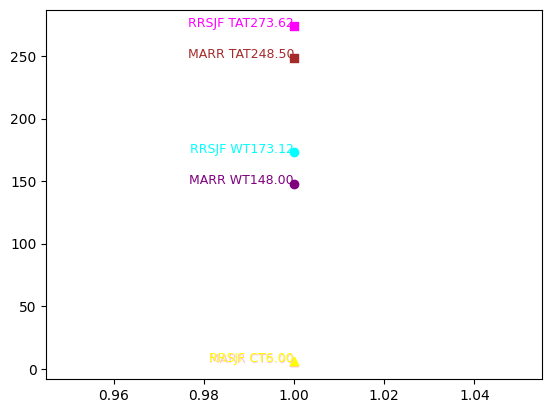

In [442]:
process_list2 = [
    Process(1, 99, 0),
    Process(2, 100, 1),
    Process(3, 101, 2),
    Process(4, 102, 3)
]

marr_result = marr_scheduling(process_list2)
process_list2 = [
    Process(1, 99, 0),
    Process(2, 100, 1),
    Process(3, 101, 2),
    Process(4, 102, 3)
]
rrsjf_result = rrsjf_scheduling(process_list2)

# Plotting MARR points
plt.scatter(1, marr_result[0], label='MARR Average Waiting Time', color='purple', marker='o')
plt.scatter(1, marr_result[1], label='MARR Average Turnaround Time', color='brown', marker='s')
plt.scatter(1, marr_result[2], label='MARR Context Switches', color='pink', marker='^')

# Adding labels for MARR points
plt.text(1, marr_result[0], f"MARR WT{marr_result[0]:.2f}", color='purple', fontsize=9, ha='right')
plt.text(1, marr_result[1], f"MARR TAT{marr_result[1]:.2f}", color='brown', fontsize=9, ha='right')
plt.text(1, marr_result[2], f"MARR CT{marr_result[2]:.2f}", color='pink', fontsize=9, ha='right')

# Plotting RRSJF points
plt.scatter(1, rrsjf_result[0], label='RRSJF Average Waiting Time', color='cyan', marker='o')
plt.scatter(1, rrsjf_result[1], label='RRSJF Average Turnaround Time', color='magenta', marker='s')
plt.scatter(1, rrsjf_result[2], label='RRSJF Context Switches', color='yellow', marker='^')

# Adding labels for RRSJF points
plt.text(1, rrsjf_result[0], f"RRSJF WT{rrsjf_result[0]:.2f}", color='cyan', fontsize=9, ha='right')
plt.text(1, rrsjf_result[1], f"RRSJF TAT{rrsjf_result[1]:.2f}", color='magenta', fontsize=9, ha='right')
plt.text(1, rrsjf_result[2], f"RRSJF CT{rrsjf_result[2]:.2f}", color='yellow', fontsize=9, ha='right')

plt.show()



Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         11 |         11 |       0
  2 |       1 |    12 | 78.92857142857143 | 77.92857142857143 | 65.92857142857143
  3 |       2 |    13 | 88.37500000000001 | 86.37500000000001 | 73.37500000000001
  4 |       3 |    14 | 90.00000000000001 | 87.00000000000001 | 73.00000000000001
  5 |       4 |     6 | 42.92857142857143 | 38.92857142857143 | 32.92857142857143
  6 |       6 |     7 | 49.92857142857143 | 43.92857142857143 | 36.92857142857143
  7 |       8 |     8 | 57.92857142857143 | 49.92857142857143 | 41.92857142857143
  8 |      10 |     5 | 62.92857142857143 | 52.92857142857143 | 47.92857142857143
  9 |      12 |    10 | 87.75000000000001 | 75.75000000000001 | 65.75000000000001
 10 |      13 |     4 | 75.57142857142857 | 62.57142857142857 | 58.57142857142857

Average Turnaround Time: 58.63
Average Waiting Time: 49.63
Total Context Switches: 17
COMPLETING CYCLE AT TIME : 75.0

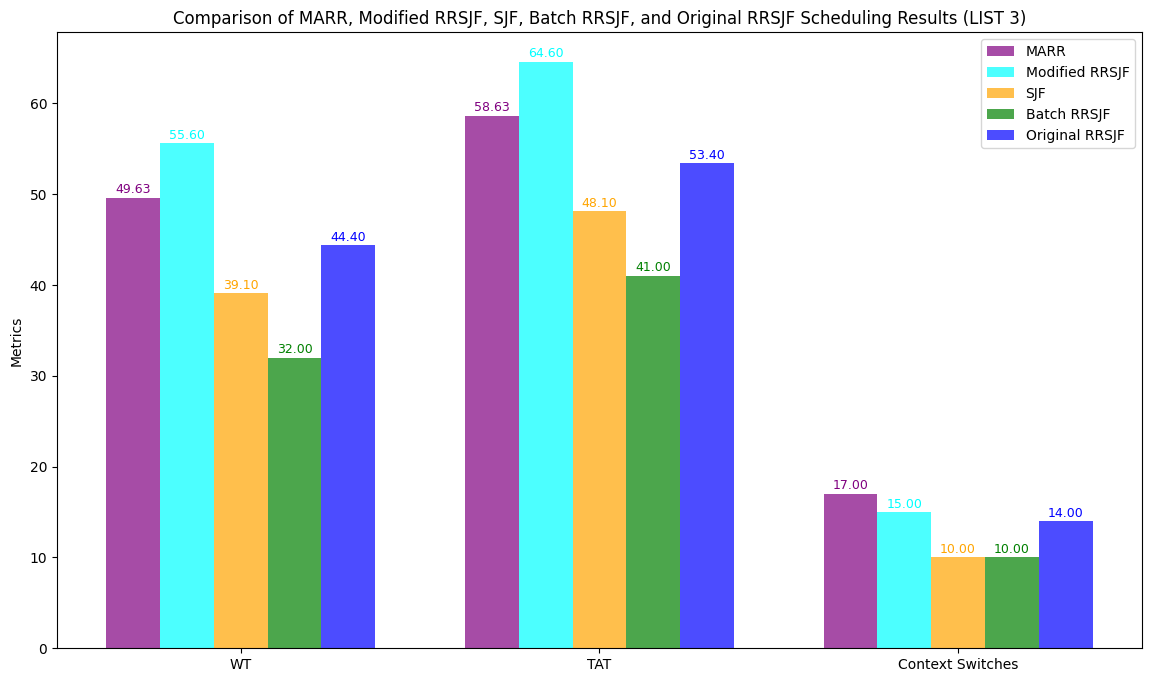

In [443]:
#Testing on Process List 3



process_list3 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3),
    Process(5, 6, 4),
    Process(6, 7, 6),
    Process(7, 8, 8),
    Process(8, 5, 10),
    Process(9, 10, 12),
    Process(10, 4, 13)
]      

marr_result = marr_scheduling(process_list3)
process_list3 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3),
    Process(5, 6, 4),
    Process(6, 7, 6),
    Process(7, 8, 8),
    Process(8, 5, 10),
    Process(9, 10, 12),
    Process(10, 4, 13)
]
rrsjf_result = rrsjf_scheduling(process_list3)

process_list3 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3),
    Process(5, 6, 4),
    Process(6, 7, 6),
    Process(7, 8, 8),
    Process(8, 5, 10),
    Process(9, 10, 12),
    Process(10, 4, 13)
]
batch_rrsjf_result = batch_rrsjf_scheduling(process_list3)

process_list3 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3),
    Process(5, 6, 4),
    Process(6, 7, 6),
    Process(7, 8, 8),
    Process(8, 5, 10),
    Process(9, 10, 12),
    Process(10, 4, 13)
]
sjf_result = SJF(process_list3)

process_list3 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3),
    Process(5, 6, 4),
    Process(6, 7, 6),
    Process(7, 8, 8),
    Process(8, 5, 10),
    Process(9, 10, 12),
    Process(10, 4, 13)
]
alternate_rrsjf_result = alternate_rrsjf_scheduling(process_list3)

# Plotting MARR, RRSJF, SJF, Batch RRSJF, and Alternate RRSJF results in a visually pleasing way
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.15
x_labels = ['WT', 'TAT', 'Context Switches']
x_marr = [0, 1, 2]
x_rrsjf = [i + bar_width for i in x_marr]
x_sjf = [i + 2 * bar_width for i in x_marr]
x_batch_rrsjf = [i + 3 * bar_width for i in x_marr]
x_alternate_rrsjf = [i + 4 * bar_width for i in x_marr]

# Plot bars for MARR results
plt.bar(x_marr, marr_result, width=bar_width, label='MARR', color='purple', alpha=0.7)

# Plot bars for RRSJF results
plt.bar(x_rrsjf, rrsjf_result, width=bar_width, label='Modified RRSJF', color='cyan', alpha=0.7)

# Plot bars for SJF results
plt.bar(x_sjf, sjf_result, width=bar_width, label='SJF', color='orange', alpha=0.7)

# Plot bars for Batch RRSJF results
plt.bar(x_batch_rrsjf, batch_rrsjf_result, width=bar_width, label='Batch RRSJF', color='green', alpha=0.7)

# Plot bars for Alternate RRSJF results
plt.bar(x_alternate_rrsjf, alternate_rrsjf_result, width=bar_width, label='Original RRSJF', color='blue', alpha=0.7)

# Add labels and title
plt.xticks([i + 2 * bar_width for i in x_marr], x_labels)
plt.ylabel('Metrics')
plt.title('Comparison of MARR, Modified RRSJF, SJF, Batch RRSJF, and Original RRSJF Scheduling Results (LIST 3)')
plt.legend()

# Add value annotations on top of bars
for i, val in enumerate(marr_result):
    plt.text(x_marr[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='purple')
for i, val in enumerate(rrsjf_result):
    plt.text(x_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='cyan')
for i, val in enumerate(sjf_result):
    plt.text(x_sjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='orange')
for i, val in enumerate(batch_rrsjf_result):
    plt.text(x_batch_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='green')
for i, val in enumerate(alternate_rrsjf_result):
    plt.text(x_alternate_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='blue')

plt.show()


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |     8 |          8 |          8 |       0
  2 |       1 |    12 | 157.66666666666669 | 156.66666666666669 | 144.66666666666669
  3 |       2 |     5 |      21.25 |      19.25 |   14.25
  4 |       3 |     9 | 140.97222222222223 | 137.97222222222223 | 128.97222222222223
  5 |       4 |     6 |       35.5 |       31.5 |    25.5
  6 |       5 |     7 |       42.5 |       37.5 |    30.5
  7 |       6 |    15 |      166.0 |      160.0 |   145.0
  8 |       7 |    10 | 145.69444444444446 | 138.69444444444446 | 128.69444444444446
  9 |       8 |     4 |       63.0 |       55.0 |    51.0
 10 |       9 |    13 | 161.72222222222223 | 152.72222222222223 | 139.72222222222223
 11 |      10 |     3 |      74.25 |      64.25 |   61.25
 12 |      11 |    14 |      165.5 |      154.5 |   140.5
 13 |      12 |    11 | 154.3888888888889 | 142.3888888888889 | 131.3888888888889
 14 |      13 |     6 |     

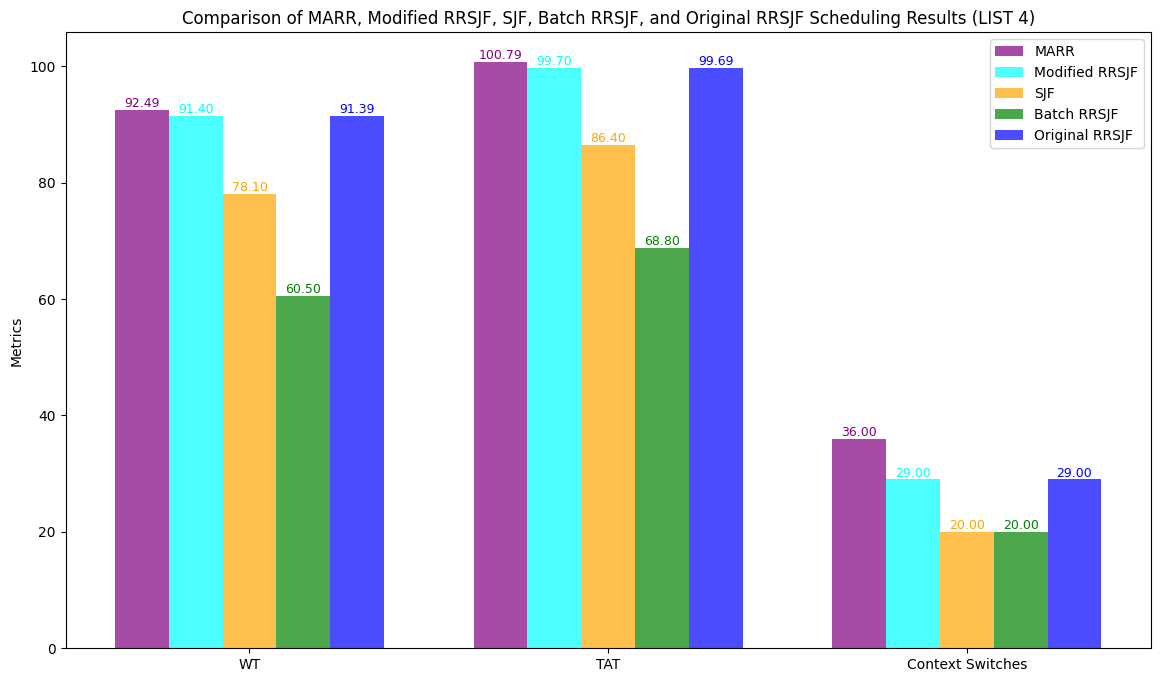

In [444]:
#Testing on Process List 4



process_list4 = [
    Process(1, 8, 0),
    Process(2, 12, 1),
    Process(3, 5, 2),
    Process(4, 9, 3),
    Process(5, 6, 4),
    Process(6, 7, 5),
    Process(7, 15, 6),
    Process(8, 10, 7),
    Process(9, 4, 8),
    Process(10, 13, 9),
    Process(11, 3, 10),
    Process(12, 14, 11),
    Process(13, 11, 12),
    Process(14, 6, 13),
    Process(15, 5, 14),
    Process(16, 7, 15),
    Process(17, 9, 16),
    Process(18, 4, 17),
    Process(19, 8, 18),
    Process(20, 10, 19)
]
    

marr_result = marr_scheduling(process_list4)
process_list4 = [
    Process(1, 8, 0),
    Process(2, 12, 1),
    Process(3, 5, 2),
    Process(4, 9, 3),
    Process(5, 6, 4),
    Process(6, 7, 5),
    Process(7, 15, 6),
    Process(8, 10, 7),
    Process(9, 4, 8),
    Process(10, 13, 9),
    Process(11, 3, 10),
    Process(12, 14, 11),
    Process(13, 11, 12),
    Process(14, 6, 13),
    Process(15, 5, 14),
    Process(16, 7, 15),
    Process(17, 9, 16),
    Process(18, 4, 17),
    Process(19, 8, 18),
    Process(20, 10, 19)
]

rrsjf_result = rrsjf_scheduling(process_list4)


process_list4 = [
    Process(1, 8, 0),
    Process(2, 12, 1),
    Process(3, 5, 2),
    Process(4, 9, 3),
    Process(5, 6, 4),
    Process(6, 7, 5),
    Process(7, 15, 6),
    Process(8, 10, 7),
    Process(9, 4, 8),
    Process(10, 13, 9),
    Process(11, 3, 10),
    Process(12, 14, 11),
    Process(13, 11, 12),
    Process(14, 6, 13),
    Process(15, 5, 14),
    Process(16, 7, 15),
    Process(17, 9, 16),
    Process(18, 4, 17),
    Process(19, 8, 18),
    Process(20, 10, 19)
]

sjf_result = SJF(process_list4)

process_list4 = [
    Process(1, 8, 0),
    Process(2, 12, 1),
    Process(3, 5, 2),
    Process(4, 9, 3),
    Process(5, 6, 4),
    Process(6, 7, 5),
    Process(7, 15, 6),
    Process(8, 10, 7),
    Process(9, 4, 8),
    Process(10, 13, 9),
    Process(11, 3, 10),
    Process(12, 14, 11),
    Process(13, 11, 12),
    Process(14, 6, 13),
    Process(15, 5, 14),
    Process(16, 7, 15),
    Process(17, 9, 16),
    Process(18, 4, 17),
    Process(19, 8, 18),
    Process(20, 10, 19)
]

batch_rrsjf_result = batch_rrsjf_scheduling(process_list4)

process_list4 = [
    Process(1, 8, 0),
    Process(2, 12, 1),
    Process(3, 5, 2),
    Process(4, 9, 3),
    Process(5, 6, 4),
    Process(6, 7, 5),
    Process(7, 15, 6),
    Process(8, 10, 7),
    Process(9, 4, 8),
    Process(10, 13, 9),
    Process(11, 3, 10),
    Process(12, 14, 11),
    Process(13, 11, 12),
    Process(14, 6, 13),
    Process(15, 5, 14),
    Process(16, 7, 15),
    Process(17, 9, 16),
    Process(18, 4, 17),
    Process(19, 8, 18),
    Process(20, 10, 19)
]
alternate_rrsjf_result = alternate_rrsjf_scheduling(process_list4)

# Plotting MARR, RRSJF, SJF, Batch RRSJF, and Alternate RRSJF results in a visually pleasing way
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.15
x_labels = ['WT', 'TAT', 'Context Switches']
x_marr = [0, 1, 2]
x_rrsjf = [i + bar_width for i in x_marr]
x_sjf = [i + 2 * bar_width for i in x_marr]
x_batch_rrsjf = [i + 3 * bar_width for i in x_marr]
x_alternate_rrsjf = [i + 4 * bar_width for i in x_marr]

# Plot bars for MARR results
plt.bar(x_marr, marr_result, width=bar_width, label='MARR', color='purple', alpha=0.7)

# Plot bars for RRSJF results
plt.bar(x_rrsjf, rrsjf_result, width=bar_width, label='Modified RRSJF', color='cyan', alpha=0.7)

# Plot bars for SJF results
plt.bar(x_sjf, sjf_result, width=bar_width, label='SJF', color='orange', alpha=0.7)

# Plot bars for Batch RRSJF results
plt.bar(x_batch_rrsjf, batch_rrsjf_result, width=bar_width, label='Batch RRSJF', color='green', alpha=0.7)

# Plot bars for Alternate RRSJF results
plt.bar(x_alternate_rrsjf, alternate_rrsjf_result, width=bar_width, label='Original RRSJF', color='blue', alpha=0.7)

# Add labels and title
plt.xticks([i + 2 * bar_width for i in x_marr], x_labels)
plt.ylabel('Metrics')
plt.title('Comparison of MARR, Modified RRSJF, SJF, Batch RRSJF, and Original RRSJF Scheduling Results (LIST 4)')
plt.legend()

# Add value annotations on top of bars
for i, val in enumerate(marr_result):
    plt.text(x_marr[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='purple')
for i, val in enumerate(rrsjf_result):
    plt.text(x_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='cyan')
for i, val in enumerate(sjf_result):
    plt.text(x_sjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='orange')
for i, val in enumerate(batch_rrsjf_result):
    plt.text(x_batch_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='green')
for i, val in enumerate(alternate_rrsjf_result):
    plt.text(x_alternate_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='blue')

plt.show()


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    25 |         25 |         25 |       0
  2 |       2 |     2 |         27 |         25 |      23
  3 |       4 |     1 |         28 |         24 |      23
  4 |       6 |     7 | 75.04166666666667 | 69.04166666666667 | 62.04166666666667
  5 |       8 |     2 | 36.208333333333336 | 28.208333333333336 | 26.208333333333336
  6 |      10 |     1 | 37.208333333333336 | 27.208333333333336 | 26.208333333333336
  7 |      12 |     2 | 39.208333333333336 | 27.208333333333336 | 25.208333333333336
  8 |      14 |    30 | 108.00000000000001 | 94.00000000000001 | 64.00000000000001
  9 |      15 |     7 | 79.79166666666667 | 64.79166666666667 | 57.79166666666667
 10 |      16 |     9 | 82.58333333333334 | 66.58333333333334 | 57.58333333333334
 11 |      17 |     4 | 61.83333333333334 | 44.83333333333334 | 40.83333333333334
 12 |      18 |     8 | 84.37500000000001 | 66.37500000000001 | 58.3750000

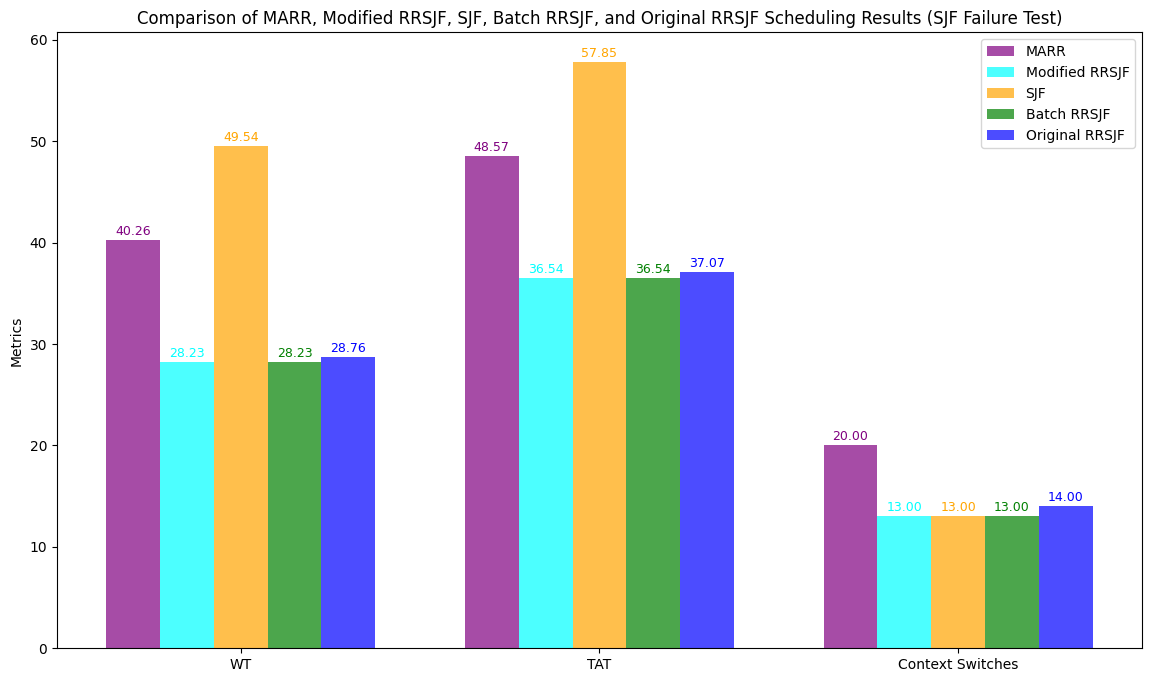

In [445]:
#Testing on Process List Meant to test the shortcomings of an SJF approach



process_list_sjf_fail = [
    Process(1, 25, 0),   # Long job arrives first
    Process(2, 2, 2),
    Process(3, 1, 4),
    Process(4, 7, 6),
    Process(5, 2, 8),
    Process(6, 1, 10),
    Process(7, 2, 12),
    Process(8, 30, 14),
    Process(9, 7, 15),
    Process(10, 9, 16),
    Process(11, 4, 17),
    Process(12, 8, 18),
    Process(13, 10, 19)
]
    

marr_result = marr_scheduling(process_list_sjf_fail)
process_list_sjf_fail = [
    Process(1, 25, 0),   # Long job arrives first
    Process(2, 2, 2),
    Process(3, 1, 4),
    Process(4, 7, 6),
    Process(5, 2, 8),
    Process(6, 1, 10),
    Process(7, 2, 12),
    Process(8, 30, 14),
    Process(9, 7, 15),
    Process(10, 9, 16),
    Process(11, 4, 17),
    Process(12, 8, 18),
    Process(13, 10, 19)
]

rrsjf_result = batch_rrsjf_scheduling(process_list_sjf_fail)


process_list_sjf_fail = [
    Process(1, 25, 0),   # Long job arrives first
    Process(2, 2, 2),
    Process(3, 1, 4),
    Process(4, 7, 6),
    Process(5, 2, 8),
    Process(6, 1, 10),
    Process(7, 2, 12),
    Process(8, 30, 14),
    Process(9, 7, 15),
    Process(10, 9, 16),
    Process(11, 4, 17),
    Process(12, 8, 18),
    Process(13, 10, 19)
]

batch_rrsjf_result = batch_rrsjf_scheduling(process_list_sjf_fail)


process_list_sjf_fail = [
    Process(1, 25, 0),   # Long job arrives first
    Process(2, 2, 2),
    Process(3, 1, 4),
    Process(4, 7, 6),
    Process(5, 2, 8),
    Process(6, 1, 10),
    Process(7, 2, 12),
    Process(8, 30, 14),
    Process(9, 7, 15),
    Process(10, 9, 16),
    Process(11, 4, 17),
    Process(12, 8, 18),
    Process(13, 10, 19)
]

sjf_result = SJF(process_list_sjf_fail)



process_list_sjf_fail = [
    Process(1, 25, 0),   # Long job arrives first
    Process(2, 2, 2),
    Process(3, 1, 4),
    Process(4, 7, 6),
    Process(5, 2, 8),
    Process(6, 1, 10),
    Process(7, 2, 12),
    Process(8, 30, 14),
    Process(9, 7, 15),
    Process(10, 9, 16),
    Process(11, 4, 17),
    Process(12, 8, 18),
    Process(13, 10, 19)
]
alternate_rrsjf_result = alternate_rrsjf_scheduling(process_list_sjf_fail)

# Plotting MARR, RRSJF, SJF, Batch RRSJF, and Alternate RRSJF results in a visually pleasing way
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.15
x_labels = ['WT', 'TAT', 'Context Switches']
x_marr = [0, 1, 2]
x_rrsjf = [i + bar_width for i in x_marr]
x_sjf = [i + 2 * bar_width for i in x_marr]
x_batch_rrsjf = [i + 3 * bar_width for i in x_marr]
x_alternate_rrsjf = [i + 4 * bar_width for i in x_marr]

# Plot bars for MARR results
plt.bar(x_marr, marr_result, width=bar_width, label='MARR', color='purple', alpha=0.7)

# Plot bars for RRSJF results
plt.bar(x_rrsjf, rrsjf_result, width=bar_width, label='Modified RRSJF', color='cyan', alpha=0.7)

# Plot bars for SJF results
plt.bar(x_sjf, sjf_result, width=bar_width, label='SJF', color='orange', alpha=0.7)

# Plot bars for Batch RRSJF results
plt.bar(x_batch_rrsjf, batch_rrsjf_result, width=bar_width, label='Batch RRSJF', color='green', alpha=0.7)

# Plot bars for Alternate RRSJF results
plt.bar(x_alternate_rrsjf, alternate_rrsjf_result, width=bar_width, label='Original RRSJF', color='blue', alpha=0.7)

# Add labels and title
plt.xticks([i + 2 * bar_width for i in x_marr], x_labels)
plt.ylabel('Metrics')
plt.title('Comparison of MARR, Modified RRSJF, SJF, Batch RRSJF, and Original RRSJF Scheduling Results (SJF Failure Test)')
plt.legend()

# Add value annotations on top of bars
for i, val in enumerate(marr_result):
    plt.text(x_marr[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='purple')
for i, val in enumerate(rrsjf_result):
    plt.text(x_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='cyan')
for i, val in enumerate(sjf_result):
    plt.text(x_sjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='orange')
for i, val in enumerate(batch_rrsjf_result):
    plt.text(x_batch_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='green')
for i, val in enumerate(alternate_rrsjf_result):
    plt.text(x_alternate_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='blue')

plt.show()



Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |         99 |         99 |       0
  2 |       1 |   100 |        199 |        198 |      98
  3 |       2 |   101 |        300 |        298 |     197
  4 |       3 |   102 |      402.0 |      399.0 |   297.0

Average Turnaround Time: 248.50
Average Waiting Time: 148.00
Total Context Switches: 5
COMPLETING CYCLE AT TIME : 99
COMPLETING CYCLE AT TIME : 402

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    99 |         99 |         99 |       0
  2 |       1 |   100 |        199 |        198 |      98
  3 |       2 |   101 |        300 |        298 |     197
  4 |       3 |   102 |        402 |        399 |     297

Average Turnaround Time: 248.50
Average Waiting Time: 148.00
Total Context Switches: 4
COMPLETING CYCLE AT TIME : 99
COMPLETING CYCLE AT TIME : 402

Process Execution Summary:
PID | Arrival | Burst | Completion | T

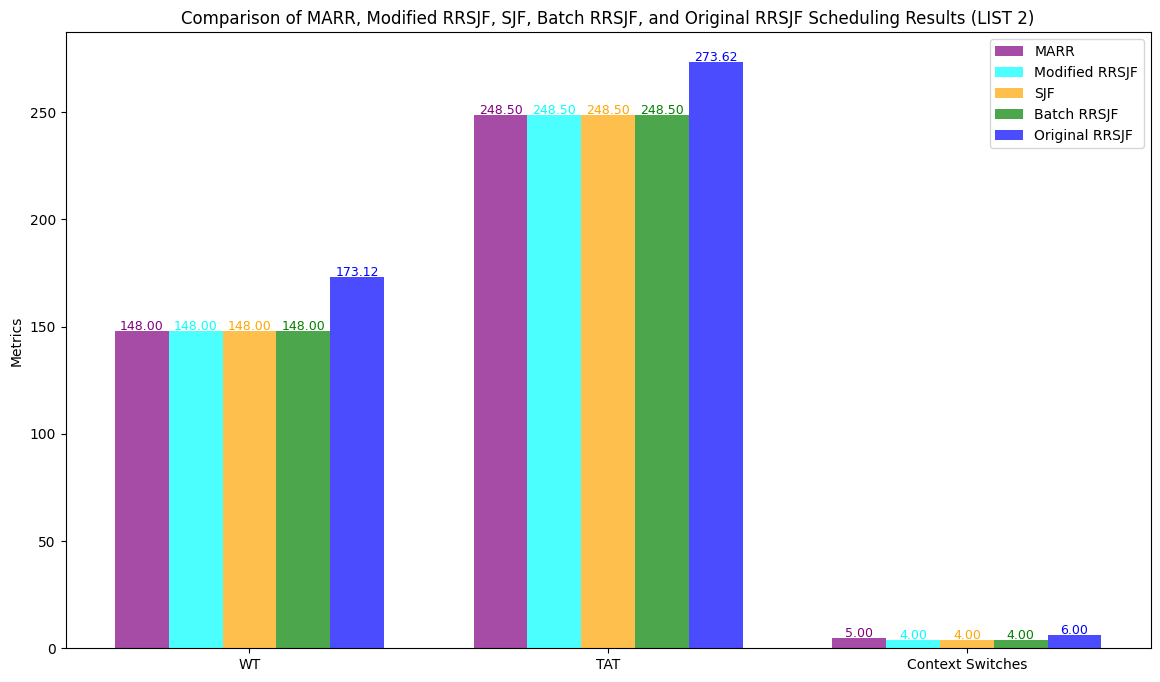

In [446]:
#Testing on Process List 2



process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]
    

marr_result = marr_scheduling(process_list2)
process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]

rrsjf_result = batch_rrsjf_scheduling(process_list2)


process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]

batch_rrsjf_result = batch_rrsjf_scheduling(process_list2)


process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]

sjf_result = SJF(process_list2)



process_list2 = [
        Process(1, 99, 0),
        Process(2, 100, 1),
        Process(3, 101, 2),
        Process(4, 102, 3)
    ]
alternate_rrsjf_result = alternate_rrsjf_scheduling(process_list2)

# Plotting MARR, RRSJF, SJF, Batch RRSJF, and Alternate RRSJF results in a visually pleasing way
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.15
x_labels = ['WT', 'TAT', 'Context Switches']
x_marr = [0, 1, 2]
x_rrsjf = [i + bar_width for i in x_marr]
x_sjf = [i + 2 * bar_width for i in x_marr]
x_batch_rrsjf = [i + 3 * bar_width for i in x_marr]
x_alternate_rrsjf = [i + 4 * bar_width for i in x_marr]

# Plot bars for MARR results
plt.bar(x_marr, marr_result, width=bar_width, label='MARR', color='purple', alpha=0.7)

# Plot bars for RRSJF results
plt.bar(x_rrsjf, rrsjf_result, width=bar_width, label='Modified RRSJF', color='cyan', alpha=0.7)

# Plot bars for SJF results
plt.bar(x_sjf, sjf_result, width=bar_width, label='SJF', color='orange', alpha=0.7)

# Plot bars for Batch RRSJF results
plt.bar(x_batch_rrsjf, batch_rrsjf_result, width=bar_width, label='Batch RRSJF', color='green', alpha=0.7)

# Plot bars for Alternate RRSJF results
plt.bar(x_alternate_rrsjf, alternate_rrsjf_result, width=bar_width, label='Original RRSJF', color='blue', alpha=0.7)

# Add labels and title
plt.xticks([i + 2 * bar_width for i in x_marr], x_labels)
plt.ylabel('Metrics')
plt.title('Comparison of MARR, Modified RRSJF, SJF, Batch RRSJF, and Original RRSJF Scheduling Results (LIST 2)')
plt.legend()

# Add value annotations on top of bars
for i, val in enumerate(marr_result):
    plt.text(x_marr[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='purple')
for i, val in enumerate(rrsjf_result):
    plt.text(x_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='cyan')
for i, val in enumerate(sjf_result):
    plt.text(x_sjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='orange')
for i, val in enumerate(batch_rrsjf_result):
    plt.text(x_batch_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='green')
for i, val in enumerate(alternate_rrsjf_result):
    plt.text(x_alternate_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='blue')

plt.show()




Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    10 |         10 |         10 |       0
  2 |       1 |   300 | 2974.0000000000005 | 2973.0000000000005 | 2673.0000000000005
  3 |       2 |    15 |      179.1 |      177.1 |   162.1
  4 |       3 |   280 | 2024.0499999999997 | 2021.0499999999997 | 1741.0499999999997
  5 |       4 |    20 |      353.2 |      349.2 |   329.2
  6 |       5 |   310 | 3034.5000000000005 | 3029.5000000000005 | 2719.5000000000005
  7 |       6 |    25 |      532.3 |      526.3 | 501.29999999999995
  8 |       7 |   290 | 2998.0000000000005 | 2991.0000000000005 | 2701.0000000000005
  9 |       8 |    30 |      716.4 |      708.4 |   678.4
 10 |       9 |   275 |    2405.25 |    2396.25 | 2121.25
 11 |      10 |    12 |      882.5 |      872.5 |   860.5
 12 |      11 |   265 |    2516.15 |    2505.15 | 2240.15
 13 |      12 |    18 |     1054.6 |     1042.6 |  1024.6
 14 |      13 |   295 | 3008.750000000000

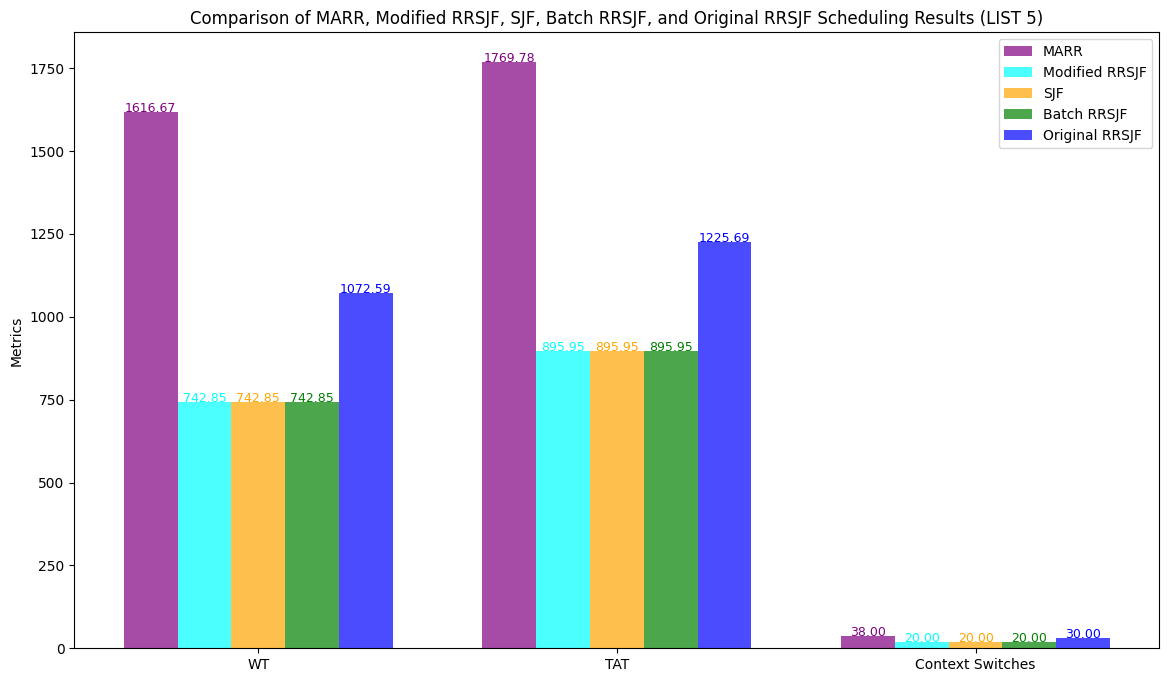

In [447]:
#Testing on Process List 5



process_list5 = [
    Process(1, 10, 0),
    Process(2, 300, 1),
    Process(3, 15, 2),
    Process(4, 280, 3),
    Process(5, 20, 4),
    Process(6, 310, 5),
    Process(7, 25, 6),
    Process(8, 290, 7),
    Process(9, 30, 8),
    Process(10, 275, 9),
    Process(11, 12, 10),
    Process(12, 265, 11),
    Process(13, 18, 12),
    Process(14, 295, 13),
    Process(15, 22, 14),
    Process(16, 250, 15),
    Process(17, 35, 16),
    Process(18, 240, 17),
    Process(19, 40, 18),
    Process(20, 330, 19)
]
    

marr_result = marr_scheduling(process_list5)
process_list5 = [
    Process(1, 10, 0),
    Process(2, 300, 1),
    Process(3, 15, 2),
    Process(4, 280, 3),
    Process(5, 20, 4),
    Process(6, 310, 5),
    Process(7, 25, 6),
    Process(8, 290, 7),
    Process(9, 30, 8),
    Process(10, 275, 9),
    Process(11, 12, 10),
    Process(12, 265, 11),
    Process(13, 18, 12),
    Process(14, 295, 13),
    Process(15, 22, 14),
    Process(16, 250, 15),
    Process(17, 35, 16),
    Process(18, 240, 17),
    Process(19, 40, 18),
    Process(20, 330, 19)
]

rrsjf_result = batch_rrsjf_scheduling(process_list5)


process_list5 = [
    Process(1, 10, 0),
    Process(2, 300, 1),
    Process(3, 15, 2),
    Process(4, 280, 3),
    Process(5, 20, 4),
    Process(6, 310, 5),
    Process(7, 25, 6),
    Process(8, 290, 7),
    Process(9, 30, 8),
    Process(10, 275, 9),
    Process(11, 12, 10),
    Process(12, 265, 11),
    Process(13, 18, 12),
    Process(14, 295, 13),
    Process(15, 22, 14),
    Process(16, 250, 15),
    Process(17, 35, 16),
    Process(18, 240, 17),
    Process(19, 40, 18),
    Process(20, 330, 19)
]

batch_rrsjf_result = batch_rrsjf_scheduling(process_list5)


process_list5 = [
    Process(1, 10, 0),
    Process(2, 300, 1),
    Process(3, 15, 2),
    Process(4, 280, 3),
    Process(5, 20, 4),
    Process(6, 310, 5),
    Process(7, 25, 6),
    Process(8, 290, 7),
    Process(9, 30, 8),
    Process(10, 275, 9),
    Process(11, 12, 10),
    Process(12, 265, 11),
    Process(13, 18, 12),
    Process(14, 295, 13),
    Process(15, 22, 14),
    Process(16, 250, 15),
    Process(17, 35, 16),
    Process(18, 240, 17),
    Process(19, 40, 18),
    Process(20, 330, 19)
]

sjf_result = SJF(process_list5)



process_list5 = [
    Process(1, 10, 0),
    Process(2, 300, 1),
    Process(3, 15, 2),
    Process(4, 280, 3),
    Process(5, 20, 4),
    Process(6, 310, 5),
    Process(7, 25, 6),
    Process(8, 290, 7),
    Process(9, 30, 8),
    Process(10, 275, 9),
    Process(11, 12, 10),
    Process(12, 265, 11),
    Process(13, 18, 12),
    Process(14, 295, 13),
    Process(15, 22, 14),
    Process(16, 250, 15),
    Process(17, 35, 16),
    Process(18, 240, 17),
    Process(19, 40, 18),
    Process(20, 330, 19)
]
alternate_rrsjf_result = alternate_rrsjf_scheduling(process_list5)

# Plotting MARR, RRSJF, SJF, Batch RRSJF, and Alternate RRSJF results in a visually pleasing way
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.15
x_labels = ['WT', 'TAT', 'Context Switches']
x_marr = [0, 1, 2]
x_rrsjf = [i + bar_width for i in x_marr]
x_sjf = [i + 2 * bar_width for i in x_marr]
x_batch_rrsjf = [i + 3 * bar_width for i in x_marr]
x_alternate_rrsjf = [i + 4 * bar_width for i in x_marr]

# Plot bars for MARR results
plt.bar(x_marr, marr_result, width=bar_width, label='MARR', color='purple', alpha=0.7)

# Plot bars for RRSJF results
plt.bar(x_rrsjf, rrsjf_result, width=bar_width, label='Modified RRSJF', color='cyan', alpha=0.7)

# Plot bars for SJF results
plt.bar(x_sjf, sjf_result, width=bar_width, label='SJF', color='orange', alpha=0.7)

# Plot bars for Batch RRSJF results
plt.bar(x_batch_rrsjf, batch_rrsjf_result, width=bar_width, label='Batch RRSJF', color='green', alpha=0.7)

# Plot bars for Alternate RRSJF results
plt.bar(x_alternate_rrsjf, alternate_rrsjf_result, width=bar_width, label='Original RRSJF', color='blue', alpha=0.7)

# Add labels and title
plt.xticks([i + 2 * bar_width for i in x_marr], x_labels)
plt.ylabel('Metrics')
plt.title('Comparison of MARR, Modified RRSJF, SJF, Batch RRSJF, and Original RRSJF Scheduling Results (LIST 5)')
plt.legend()

# Add value annotations on top of bars
for i, val in enumerate(marr_result):
    plt.text(x_marr[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='purple')
for i, val in enumerate(rrsjf_result):
    plt.text(x_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='cyan')
for i, val in enumerate(sjf_result):
    plt.text(x_sjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='orange')
for i, val in enumerate(batch_rrsjf_result):
    plt.text(x_batch_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='green')
for i, val in enumerate(alternate_rrsjf_result):
    plt.text(x_alternate_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='blue')

plt.show()


Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         11 |         11 |       0
  2 |       1 |    12 |         23 |         22 |      10
  3 |       2 |    13 |         36 |         34 |      21
  4 |       3 |    14 |       50.0 |       47.0 |    33.0

Average Turnaround Time: 28.50
Average Waiting Time: 16.00
Total Context Switches: 5
COMPLETING CYCLE AT TIME : 11
COMPLETING CYCLE AT TIME : 50

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaround | Waiting
  1 |       0 |    11 |         11 |         11 |       0
  2 |       1 |    12 |         23 |         22 |      10
  3 |       2 |    13 |         36 |         34 |      21
  4 |       3 |    14 |         50 |         47 |      33

Average Turnaround Time: 28.50
Average Waiting Time: 16.00
Total Context Switches: 4
COMPLETING CYCLE AT TIME : 11
COMPLETING CYCLE AT TIME : 50

Process Execution Summary:
PID | Arrival | Burst | Completion | Turnaro

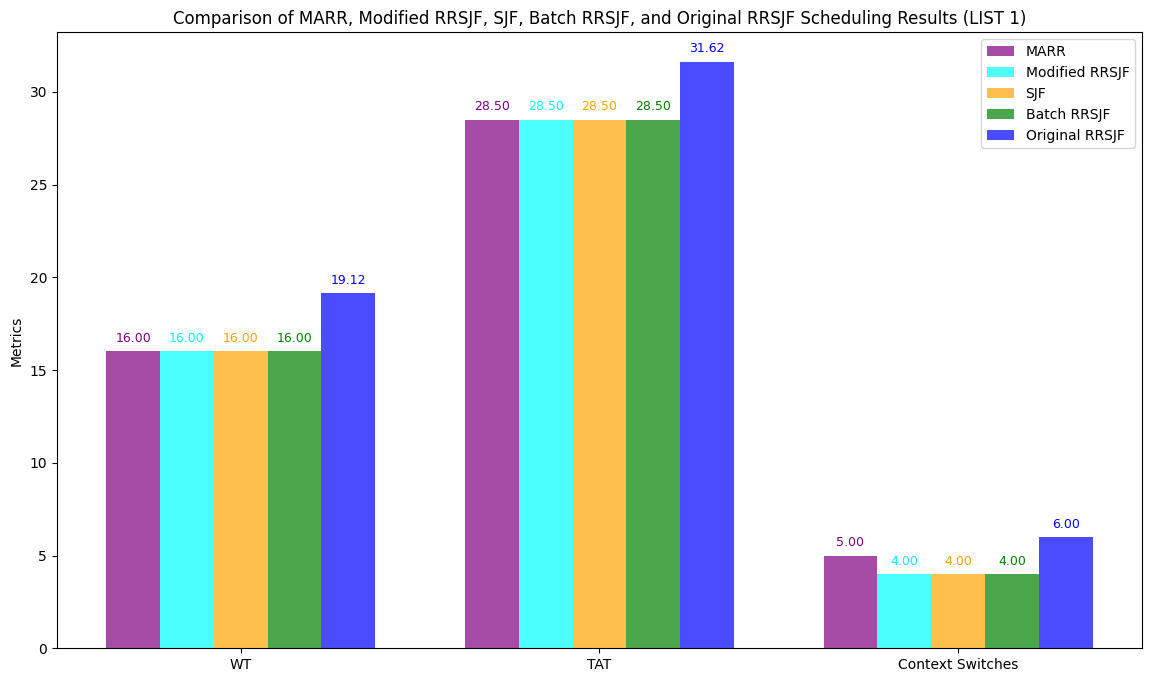

In [448]:
#Testing on Process List 1



process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]
    

marr_result = marr_scheduling(process_list1)
process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

rrsjf_result = batch_rrsjf_scheduling(process_list1)


process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

batch_rrsjf_result = batch_rrsjf_scheduling(process_list1)


process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]

sjf_result = SJF(process_list1)



process_list1 = [
    Process(1, 11, 0),
    Process(2, 12, 1),
    Process(3, 13, 2),
    Process(4, 14, 3)
]
alternate_rrsjf_result = alternate_rrsjf_scheduling(process_list1)

# Plotting MARR, RRSJF, SJF, Batch RRSJF, and Alternate RRSJF results in a visually pleasing way
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.15
x_labels = ['WT', 'TAT', 'Context Switches']
x_marr = [0, 1, 2]
x_rrsjf = [i + bar_width for i in x_marr]
x_sjf = [i + 2 * bar_width for i in x_marr]
x_batch_rrsjf = [i + 3 * bar_width for i in x_marr]
x_alternate_rrsjf = [i + 4 * bar_width for i in x_marr]

# Plot bars for MARR results
plt.bar(x_marr, marr_result, width=bar_width, label='MARR', color='purple', alpha=0.7)

# Plot bars for RRSJF results
plt.bar(x_rrsjf, rrsjf_result, width=bar_width, label='Modified RRSJF', color='cyan', alpha=0.7)

# Plot bars for SJF results
plt.bar(x_sjf, sjf_result, width=bar_width, label='SJF', color='orange', alpha=0.7)

# Plot bars for Batch RRSJF results
plt.bar(x_batch_rrsjf, batch_rrsjf_result, width=bar_width, label='Batch RRSJF', color='green', alpha=0.7)

# Plot bars for Alternate RRSJF results
plt.bar(x_alternate_rrsjf, alternate_rrsjf_result, width=bar_width, label='Original RRSJF', color='blue', alpha=0.7)

# Add labels and title
plt.xticks([i + 2 * bar_width for i in x_marr], x_labels)
plt.ylabel('Metrics')
plt.title('Comparison of MARR, Modified RRSJF, SJF, Batch RRSJF, and Original RRSJF Scheduling Results (LIST 1)')
plt.legend()

# Add value annotations on top of bars
for i, val in enumerate(marr_result):
    plt.text(x_marr[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='purple')
for i, val in enumerate(rrsjf_result):
    plt.text(x_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='cyan')
for i, val in enumerate(sjf_result):
    plt.text(x_sjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='orange')
for i, val in enumerate(batch_rrsjf_result):
    plt.text(x_batch_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='green')
for i, val in enumerate(alternate_rrsjf_result):
    plt.text(x_alternate_rrsjf[i], val + 0.5, f"{val:.2f}", ha='center', fontsize=9, color='blue')

plt.show()